# Import Dataset Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("marketing_campaign_data.csv").drop(["Unnamed: 0", "ID"], axis=1)
df.sample(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2061,1981,S3,Lajang,NaN,1,0,31-05-2013,82,23000,0,15000,0,2000,7000,2,3,0,3,6,0,0,0,0,0,0,3,11,0
458,1952,S1,Menikah,50300000.0,0,1,25-05-2014,52,143000,15000,60000,24000,23000,5000,2,2,1,8,2,0,0,0,0,0,0,3,11,0
137,1959,S3,Menikah,33762000.0,2,1,07-07-2013,61,53000,1000,34000,2000,0,16000,3,2,2,2,8,0,0,0,0,0,0,3,11,0
162,1984,S1,Menikah,23228000.0,1,0,05-01-2014,91,53000,3000,49000,7000,4000,5000,4,3,0,4,8,0,0,0,0,0,0,3,11,0
815,1970,S3,Bertunangan,65968000.0,0,1,12-05-2014,12,376000,9000,83000,19000,4000,4000,2,5,4,7,3,0,0,0,0,0,0,3,11,0


# Data Cleaning for EDA

## Missing Values

In [3]:
# Cek null values in the dataset
df.isnull().sum()[df.isnull().sum() > 0]

Income    24
dtype: int64

In [4]:
# impute missing values in 'Income' column with median
df['Income'].fillna(df['Income'].median(), inplace=True)

In [5]:
# Cek null values again
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

## Duplicate

In [6]:
# check for duplicates
df.duplicated().sum()

np.int64(183)

In [7]:
# Drop duplicates
df.drop_duplicates(inplace=True, ignore_index=True)

In [8]:
# check for duplicates again
df.duplicated().sum()

np.int64(0)

# Feature Engineering

In [9]:
import datetime as dt

# create ConversionRate
df['ConversionRate'] = df['Response'] / df['NumWebVisitsMonth'].replace(0, np.nan) # replace 0 with nan to avoid zero division

# create Age column
current_year = dt.datetime.today().year
df['Age'] = current_year - df['Year_Birth']
df.drop('Year_Birth', axis=1, inplace=True)

# create column for the number of children
df['Children'] = df['Kidhome'] + df['Teenhome']
df.drop(['Kidhome', 'Teenhome'], axis=1, inplace=True)

# create column for the total expenditure
spend_cols = ['MntCoke', 'MntFruits', 'MntMeatProducts',
              'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

df['TotalSpend'] = df[spend_cols].sum(axis=1)
df.drop(spend_cols, axis=1, inplace=True)

# create column for the spending group
df['SpendingGroup'] = pd.qcut(df['TotalSpend'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Membuat kolom NumAcceptedCampaigns
acc_camp = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df['NumAcceptedCampaigns'] = (df[acc_camp]).sum(axis=1)
df.drop(acc_camp, axis=1, inplace=True)

# create column for the total transactions
trans_cols = ['NumDealsPurchases', 'NumWebPurchases', 
              'NumCatalogPurchases', 'NumStorePurchases']

df['TotalTransactions'] = df[trans_cols].sum(axis=1)
df.drop(trans_cols, axis=1, inplace=True)

# Create a Group for TotalTransactions
df['TransactionGroup'] = pd.qcut(df['TotalTransactions'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# create AgeGroup to group age based on customers' life stage
bins = [0, 29, 45, 60, 100]
labels = ['Young Adults (<30)', 'Adults (30-45)', 'Middle Age (46-60)', 'Seniors (>60)']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Bin income into quantile-based groups (e.g., 5 groups: very low to very high)
df['IncomeGroup'] = pd.qcut(df['Income'], q=5, labels=[
    'Very Low', 'Low', 'Medium', 'High', 'Very High'
])

In [10]:
df.sample(5)

,Education,Marital_Status,Income,Dt_Customer,Recency,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,ConversionRate,Age,Children,TotalSpend,SpendingGroup,NumAcceptedCampaigns,TotalTransactions,TransactionGroup,AgeGroup,IncomeGroup
2049,S1,Lajang,11012000.0,16-03-2013,82,9,0,3,11,0,0.0,41,1,84000,Low,1,9,Low,Adults (30-45),Very Low
22,S3,Menikah,58607000.0,23-12-2012,63,8,0,3,11,0,0.0,76,1,972000,High,1,17,Medium,Seniors (>60),High
296,S1,Cerai,35246000.0,16-04-2014,53,5,0,3,11,0,0.0,67,2,62000,Low,0,11,Low,Seniors (>60),Low
927,S1,Menikah,59041000.0,07-05-2014,25,5,0,3,11,0,0.0,52,2,96000,Low,0,8,Low,Middle Age (46-60),High
742,S1,Menikah,48726000.0,27-04-2013,90,6,0,3,11,0,0.0,70,1,242000,Medium,0,12,Low,Seniors (>60),Medium


In [11]:
df.describe()

,Income,Recency,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,ConversionRate,Age,Children,TotalSpend,NumAcceptedCampaigns,TotalTransactions
count,2.057000e+03,2057.000000,2057.000000,2057.000000,2057.0,2057.0,2057.000000,2046.000000,2057.000000,2057.000000,2.057000e+03,2057.000000,2057.000000
mean,5.234831e+07,48.974234,5.318425,0.009723,3.0,11.0,0.151677,0.044197,56.214876,0.954789,6.063291e+05,0.300438,14.867282
std,2.538384e+07,28.988523,2.439784,0.098148,0.0,0.0,0.358795,0.142828,11.976449,0.748798,6.029714e+05,0.678437,7.664752
min,1.730000e+06,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,29.000000,0.000000,5.000000e+03,0.000000,0.000000
25%,3.570100e+07,24.000000,3.000000,0.000000,3.0,11.0,0.000000,0.000000,48.000000,0.000000,6.900000e+04,0.000000,8.000000
50%,5.138150e+07,49.000000,6.000000,0.000000,3.0,11.0,0.000000,0.000000,55.000000,1.000000,3.960000e+05,0.000000,15.000000
75%,6.827400e+07,74.000000,7.000000,0.000000,3.0,11.0,0.000000,0.000000,66.000000,1.000000,1.047000e+06,0.000000,21.000000
max,6.666660e+08,99.000000,20.000000,1.000000,3.0,11.0,1.000000,1.000000,132.000000,3.000000,2.525000e+06,4.000000,44.000000


In [12]:
df.isnull().sum()

Education                0
Marital_Status           0
Income                   0
Dt_Customer              0
Recency                  0
NumWebVisitsMonth        0
Complain                 0
Z_CostContact            0
Z_Revenue                0
Response                 0
ConversionRate          11
Age                      0
Children                 0
TotalSpend               0
SpendingGroup            0
NumAcceptedCampaigns     0
TotalTransactions        0
TransactionGroup         0
AgeGroup                 3
IncomeGroup              0
dtype: int64

In [13]:
# Impute missing values on ConversionRate with 0 and categorical columns with mode
impute_cols = {
    'ConversionRate': 0,
    'AgeGroup': df['AgeGroup'].mode()[0], 
}
df.fillna(impute_cols, inplace=True)

In [14]:
df.shape

(2057, 20)

# EDA

## `ConversionRate` vs `AgeGroup`

In [15]:
df.groupby('AgeGroup')['ConversionRate'].count().reset_index()

,AgeGroup,ConversionRate
0,Young Adults (<30),2
1,Adults (30-45),387
2,Middle Age (46-60),948
3,Seniors (>60),720


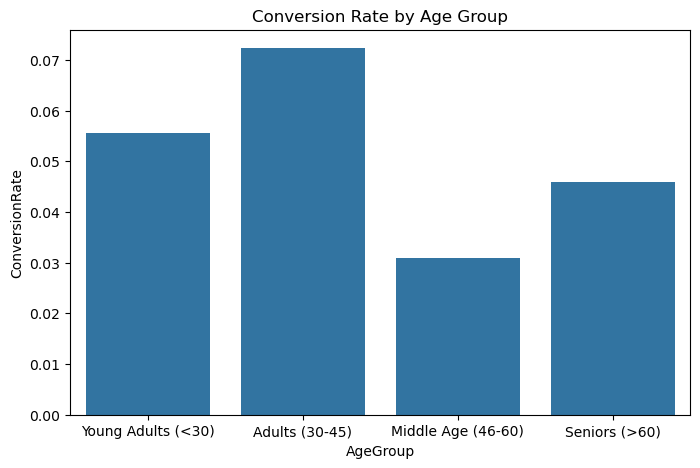

In [16]:
# Hubungan Conversion Rate dengan AgeGroup
plt.figure(figsize=(8,5))
sns.barplot(x='AgeGroup', y='ConversionRate', data=df, ci=None)
plt.title("Conversion Rate by Age Group")
plt.grid(False)
plt.show()

## `ConversionRate` vs `IncomeGroup`

In [17]:
df.groupby('IncomeGroup')['ConversionRate'].count().reset_index()

,IncomeGroup,ConversionRate
0,Very Low,412
1,Low,411
2,Medium,411
3,High,411
4,Very High,412


In [18]:
# Inspect Bin Edges
income_bins, bin_edges = pd.qcut(df['Income'], q=5, retbins=True)
print(bin_edges)

[1.73000e+06 3.23332e+07 4.51004e+07 5.81022e+07 7.16868e+07 6.66666e+08]


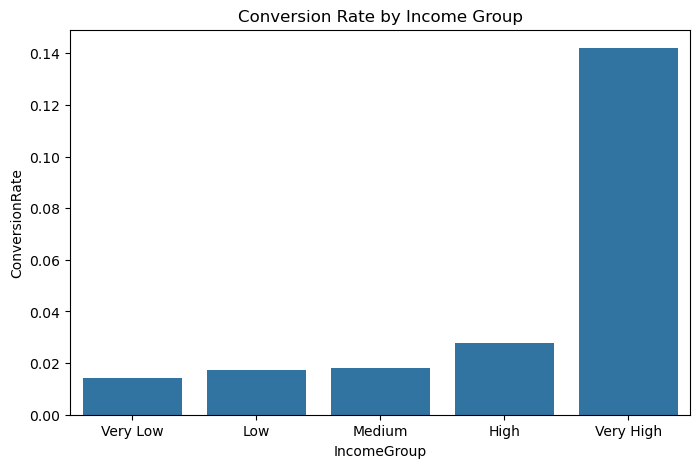

In [19]:
# Hubungan Conversion Rate dengan IncomeGroup
plt.figure(figsize=(8,5))
sns.barplot(x='IncomeGroup', y='ConversionRate', data=df, ci=None)
plt.title("Conversion Rate by Income Group")
plt.grid(False)
plt.show()

## `ConversionRate` vs `Marital_Status`

In [20]:
df.groupby('Marital_Status')['ConversionRate'].count().reset_index()

,Marital_Status,ConversionRate
0,Bertunangan,521
1,Cerai,216
2,Duda,3
3,Janda,71
4,Lajang,451
5,Menikah,795


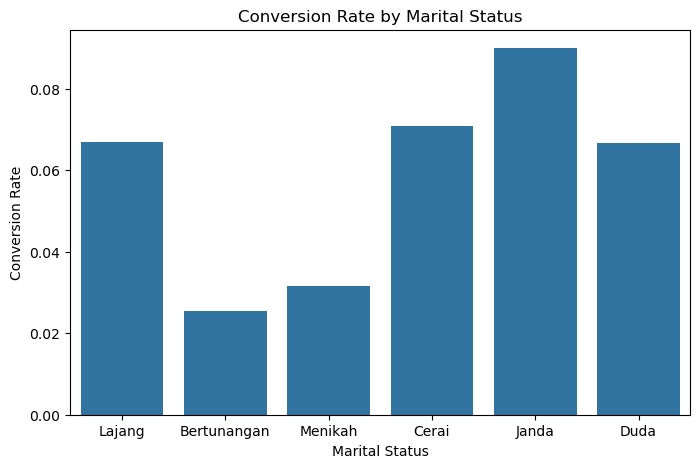

In [21]:
# Hubungan Conversion Rate dengan Marital_Status
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Marital_Status', y='ConversionRate', ci=None)
plt.title('Conversion Rate by Marital Status')
plt.ylabel('Conversion Rate')
plt.xlabel('Marital Status')
plt.grid(False)
plt.show()

## `ConversionRate` vs `Children`

In [22]:
df.groupby('Children')['ConversionRate'].count().reset_index()

,Children,ConversionRate
0,0,577
1,1,1044
2,2,388
3,3,48


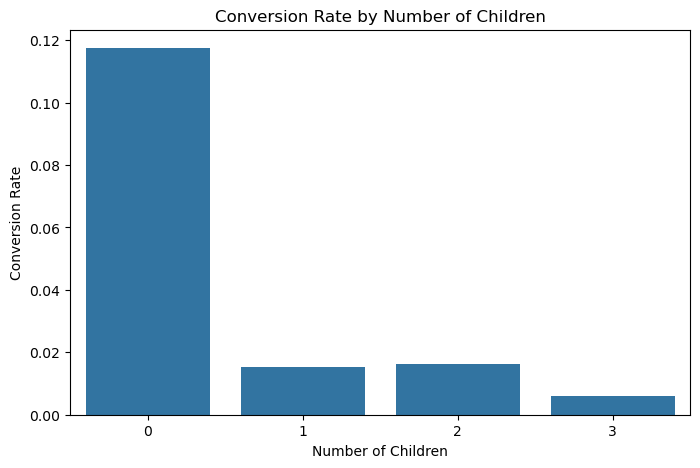

In [23]:
# Hubungan Conversion Rate dengan Children
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Children', y='ConversionRate', ci=None)
plt.title('Conversion Rate by Number of Children')
plt.ylabel('Conversion Rate')
plt.xlabel('Number of Children')
plt.grid(False)
plt.show()

## `ConversionRate` vs `SpendingGroup`

In [24]:
df.groupby('SpendingGroup')['ConversionRate'].count().reset_index()

,SpendingGroup,ConversionRate
0,Very Low,415
1,Low,408
2,Medium,411
3,High,412
4,Very High,411


In [25]:
# Inspect Bin Edges
spend_bins, bin_edges = pd.qcut(df['TotalSpend'], q=5, retbins=True)
print(bin_edges)

[   5000.   55000.  198400.  635600. 1173000. 2525000.]


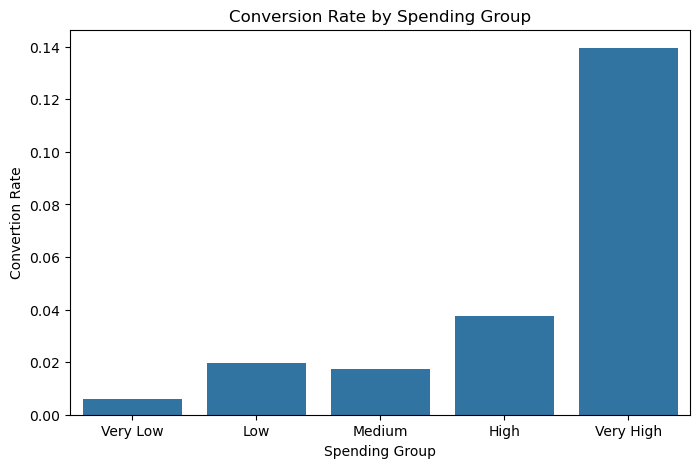

In [26]:
# Hubungan Conversion Rate dengan TotalSpending
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='SpendingGroup', y='ConversionRate', ci=None)
plt.title('Conversion Rate by Spending Group')
plt.ylabel('Convertion Rate')
plt.xlabel('Spending Group')
plt.grid(False)
plt.show()

## `ConversionRate` vs `Education`

In [27]:
df.groupby('Education')['ConversionRate'].count().reset_index()

,Education,ConversionRate
0,D3,188
1,S1,1030
2,S2,341
3,S3,449
4,SMA,49


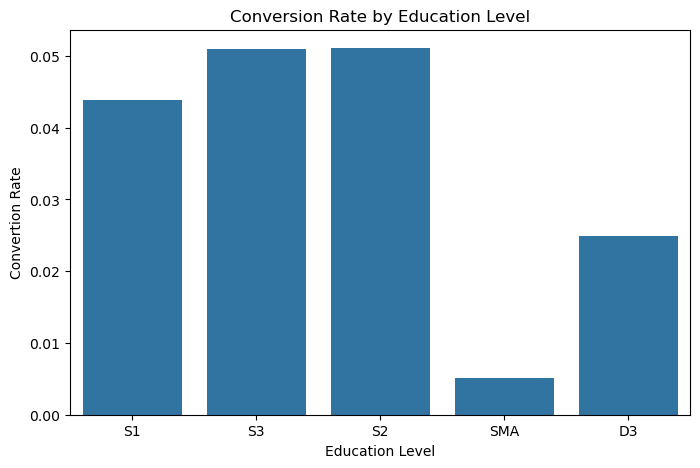

In [28]:
# Hubungan Conversion Rate dengan Education Level
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Education', y='ConversionRate', ci=None)
plt.title('Conversion Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Convertion Rate')
plt.grid(False)
plt.show()

## `ConversionRate` vs `TransactionGroup`

In [29]:
df.groupby('TransactionGroup')['ConversionRate'].count().reset_index()

,TransactionGroup,ConversionRate
0,Very Low,508
1,Low,378
2,Medium,365
3,High,421
4,Very High,385


In [30]:
# Inspect Bin Edges
ts_bins, bin_edges = pd.qcut(df['TotalTransactions'], q=5, retbins=True)
print(bin_edges)

[ 0.  7. 12. 17. 22. 44.]


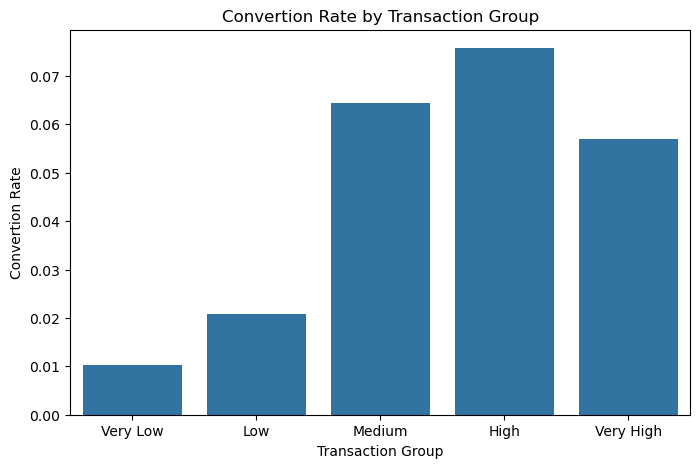

In [31]:
# Hubungan Conversion Rate dengan Transaction Group
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='TransactionGroup', y='ConversionRate', ci=None)
plt.title('Convertion Rate by Transaction Group')
plt.xlabel('Transaction Group')
plt.ylabel('Convertion Rate')
plt.grid(False)
plt.show()

# Preprocessing

## Outlier Handling

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057 entries, 0 to 2056
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Education             2057 non-null   object  
 1   Marital_Status        2057 non-null   object  
 2   Income                2057 non-null   float64 
 3   Dt_Customer           2057 non-null   object  
 4   Recency               2057 non-null   int64   
 5   NumWebVisitsMonth     2057 non-null   int64   
 6   Complain              2057 non-null   int64   
 7   Z_CostContact         2057 non-null   int64   
 8   Z_Revenue             2057 non-null   int64   
 9   Response              2057 non-null   int64   
 10  ConversionRate        2057 non-null   float64 
 11  Age                   2057 non-null   int64   
 12  Children              2057 non-null   int64   
 13  TotalSpend            2057 non-null   int64   
 14  SpendingGroup         2057 non-null   category
 15  NumA

In [33]:
numeric_feats = df.select_dtypes(exclude=['object', 'category']).drop(['Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'NumWebVisitsMonth'], axis=1).columns.to_list()

# Cek variance dari fitur2 numerik
df[numeric_feats].nunique()

Income                  1975
Recency                  100
ConversionRate            11
Age                       59
Children                   4
TotalSpend              1054
NumAcceptedCampaigns       5
TotalTransactions         39
dtype: int64

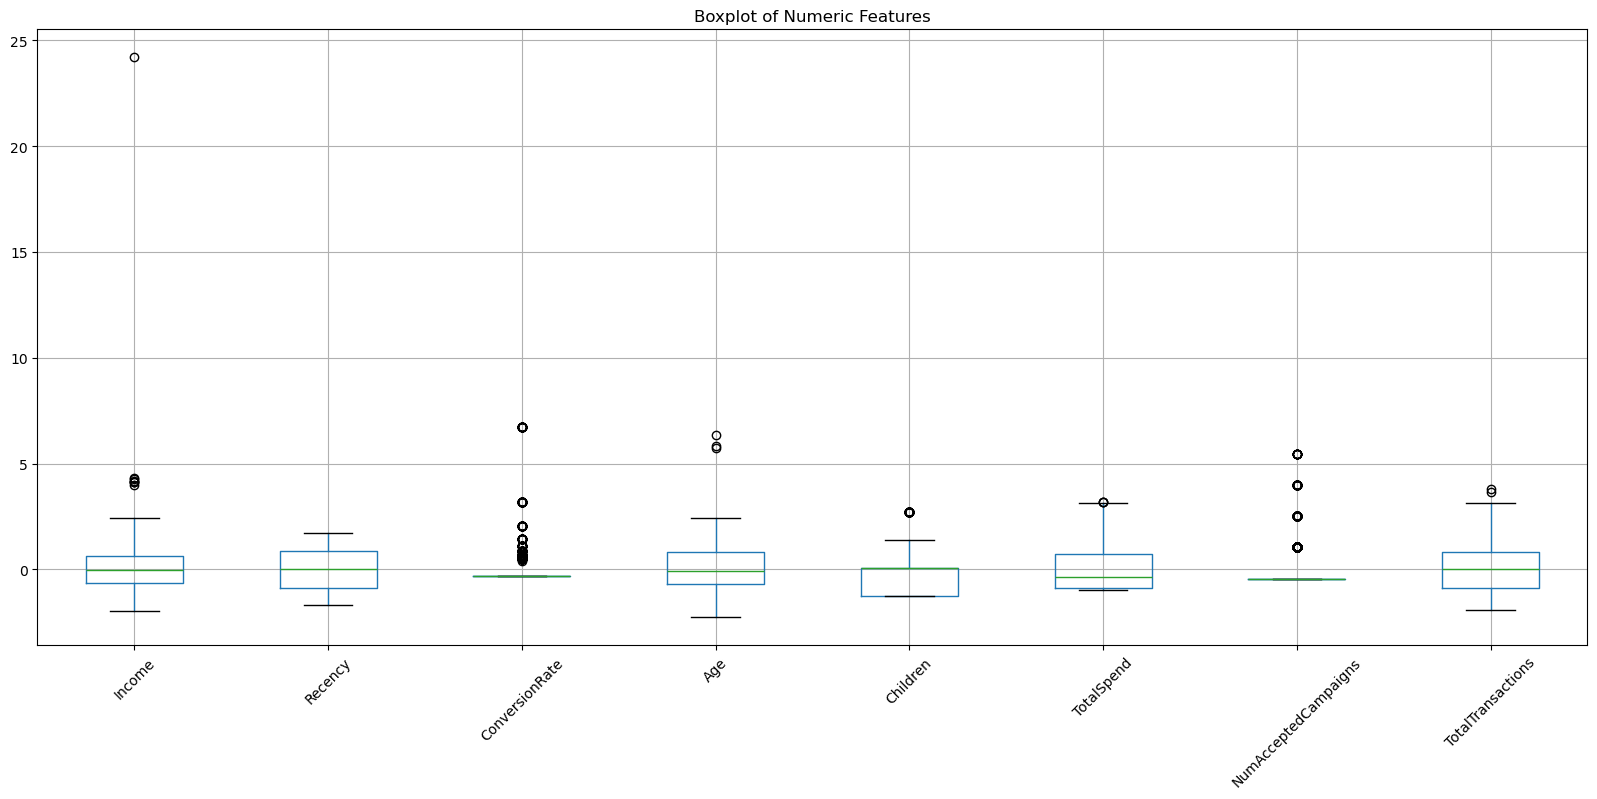

In [34]:
# Bandingkan distribusi pada fitur2 numerik yang tersandarisasi
standardized = ((df[numeric_feats] - df[numeric_feats].mean()) / df[numeric_feats].std())

# Plot data numerik menggunakan boxplot
plt.figure(figsize=(20, 8))
standardized.boxplot(rot=45)
plt.title("Boxplot of Numeric Features")
plt.show()

From the boxplot visualization of these standardized numerical features, we can see that most of the numerical features contain outlier values. Therefore, we need to handle these values before proceeding to the next step.

In [35]:
# Deteksi outlier pada kolom Income dengan IQR
for col in df[numeric_feats].columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    if outliers.shape[0] > 0:
        print(f"{col} - Jumlah outlier: {outliers.shape[0]} - Persentase {round((outliers.shape[0] / df.shape[0]) * 100)}%")

Income - Jumlah outlier: 8 - Persentase 0%
ConversionRate - Jumlah outlier: 312 - Persentase 15%
Age - Jumlah outlier: 3 - Persentase 0%
Children - Jumlah outlier: 48 - Persentase 2%
TotalSpend - Jumlah outlier: 3 - Persentase 0%
NumAcceptedCampaigns - Jumlah outlier: 431 - Persentase 21%
TotalTransactions - Jumlah outlier: 2 - Persentase 0%


Since the primary goal of this analysis is to predict customer characteristics in order to improve the effectiveness of marketing campaigns, it is important to retain customer data that reflects extreme behaviors, such as big spenders or highly engaged customers.

Therefore, we decided to use the capping method (setting upper and lower bounds based on the IQR) rather than removing outliers entirely. This approach helps avoid losing the most valuable customer segments, which often fall outside the normal distribution. Additionally, it prevents bias toward the average data, especially when the proportion of outliers is relatively large (>5–10%), where removal could significantly impact the overall data representation.

We acknowledge that not all outliers are noise. In the context of marketing, extreme values can indicate important business opportunities. For example, a customer who spends 10 times more than the average may be a prime target for premium campaigns and should be further analyzed, not disregarded.

In [36]:
# Buat fungsi untuk menerapkan capping
def cap_outliers_iqr(df, columns):
    df_capped = df.copy()
    
    for col in columns:
        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        df_capped[col] = df_capped[col].clip(lower=lower, upper=upper)
        
    return df_capped

In [37]:
# exclude NumAcceptedCampaigns & ConversionRate dari capping outliers untuk menghindari transformasi menjadi constant
outliers_cols = [col for col in numeric_feats if col not in ['NumAcceptedCampaigns', 'ConversionRate']]

# Cap outliers
df_capped = cap_outliers_iqr(df, outliers_cols)

# Gabungkan dengan dataset sebelumnya
df_clean = pd.concat([df.drop(columns=df_capped.columns), df_capped], axis=1)

# Check stats
df_clean.describe()

,Income,Recency,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,ConversionRate,Age,Children,TotalSpend,NumAcceptedCampaigns,TotalTransactions
count,2.057000e+03,2057.000000,2057.000000,2057.000000,2057.0,2057.0,2057.000000,2057.000000,2057.000000,2057.000000,2.057000e+03,2057.000000,2057.000000
mean,5.194200e+07,48.974234,5.318425,0.009723,3.0,11.0,0.151677,0.043961,56.164317,0.943121,6.063136e+05,0.300438,14.864366
std,2.095013e+07,28.988523,2.439784,0.098148,0.0,0.0,0.358795,0.142482,11.744948,0.720174,6.029220e+05,0.678437,7.654398
min,1.730000e+06,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,29.000000,0.000000,5.000000e+03,0.000000,0.000000
25%,3.570100e+07,24.000000,3.000000,0.000000,3.0,11.0,0.000000,0.000000,48.000000,0.000000,6.900000e+04,0.000000,8.000000
50%,5.138150e+07,49.000000,6.000000,0.000000,3.0,11.0,0.000000,0.000000,55.000000,1.000000,3.960000e+05,0.000000,15.000000
75%,6.827400e+07,74.000000,7.000000,0.000000,3.0,11.0,0.000000,0.000000,66.000000,1.000000,1.047000e+06,0.000000,21.000000
max,1.171335e+08,99.000000,20.000000,1.000000,3.0,11.0,1.000000,1.000000,93.000000,2.500000,2.514000e+06,4.000000,40.500000


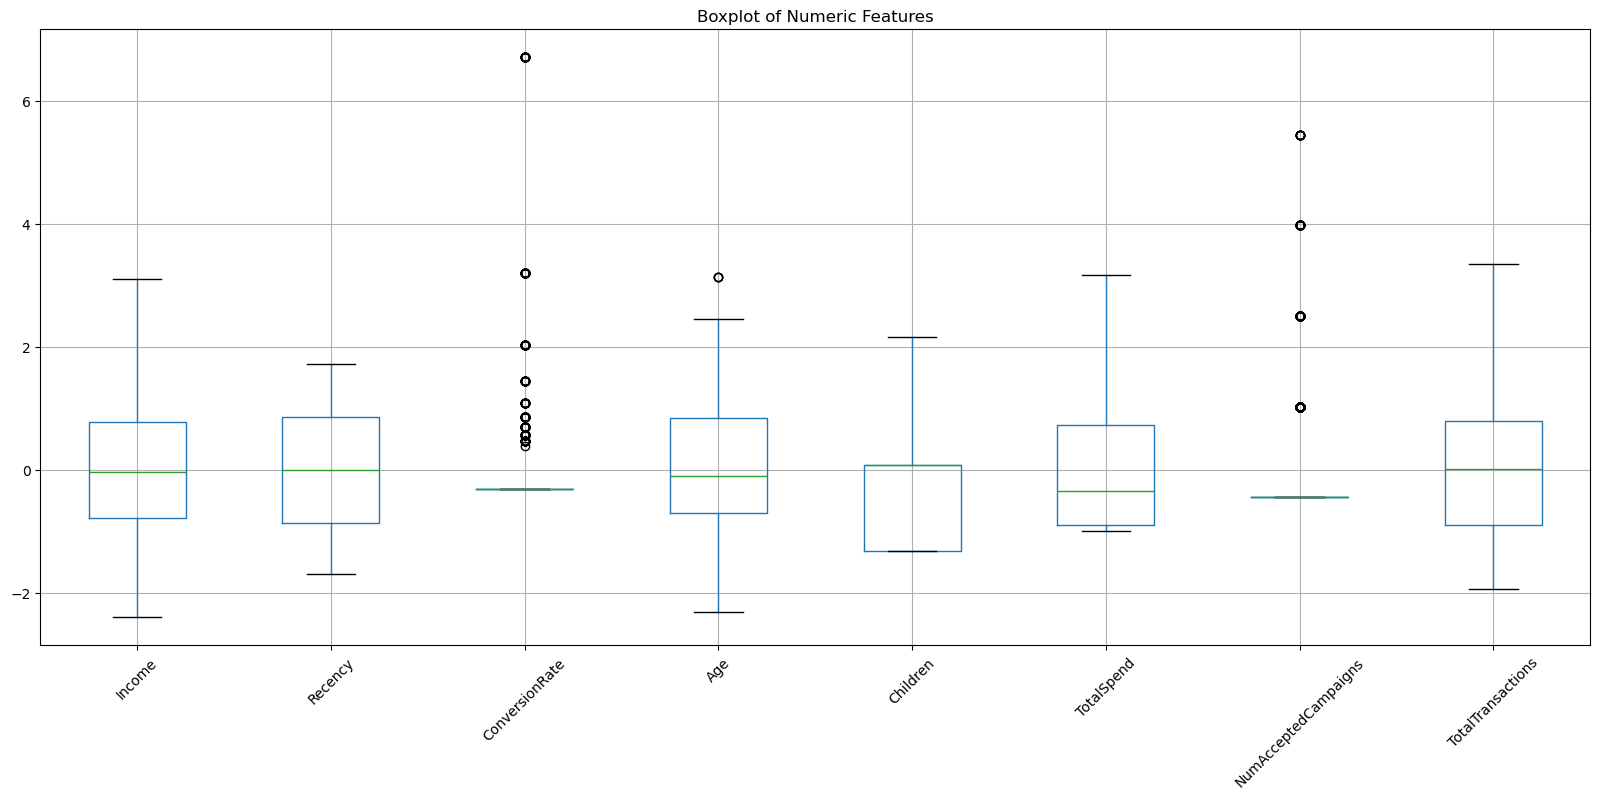

In [38]:
# Bandingkan distribusi pada fitur2 numerik yang tersandarisasi
standardized = ((df_clean[numeric_feats] - df_clean[numeric_feats].mean()) / df_clean[numeric_feats].std())

# Plot data numerik menggunakan boxplot
plt.figure(figsize=(20, 8))
standardized.boxplot(rot=45)
plt.title("Boxplot of Numeric Features")
plt.show()

## Feature Encoding

In [39]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'NumWebVisitsMonth', 'Complain', 'Z_CostContact', 'Z_Revenue',
       'Response', 'ConversionRate', 'Age', 'Children', 'TotalSpend',
       'SpendingGroup', 'NumAcceptedCampaigns', 'TotalTransactions',
       'TransactionGroup', 'AgeGroup', 'IncomeGroup'],
      dtype='object')

In [40]:
# Kategorikan setiap kolom berdasarkan tipe datanya
# Numeric Features (Kontinu)
numeric_feat = [
    'Age', 'Income', 'Children', 'Recency', 'TotalSpend', 'NumWebVisitsMonth', 'TotalTransactions', 'NumAcceptedCampaigns'
]

# Nominal Features (Kategori tanpa urutan, seperti status pendidikan atau status pernikahan)
nominal_feat = [
    'Education', 'Marital_Status'
]

# Binary Features (Kolom dengan dua kategori, biasanya 0 atau 1)
binary_feat = ['Complain']

# Menampilkan hasil kategori
print("Numeric Features:", numeric_feat)
print("Nominal Features:", nominal_feat)
print("Binary Features:", binary_feat)

Numeric Features: ['Age', 'Income', 'Children', 'Recency', 'TotalSpend', 'NumWebVisitsMonth', 'TotalTransactions', 'NumAcceptedCampaigns']
Nominal Features: ['Education', 'Marital_Status']
Binary Features: ['Complain']


In [41]:
df_clean.sample(5)

,Education,Marital_Status,Income,Dt_Customer,Recency,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,ConversionRate,Age,Children,TotalSpend,SpendingGroup,NumAcceptedCampaigns,TotalTransactions,TransactionGroup,AgeGroup,IncomeGroup
353,S3,Menikah,68462000.0,12-12-2012,6,1,0,3,11,0,0.0,56,0.0,1670000,Very High,0,15.0,Medium,Middle Age (46-60),High
433,S1,Menikah,28691000.0,04-07-2013,56,8,0,3,11,0,0.0,36,1.0,34000,Very Low,0,5.0,Very Low,Adults (30-45),Very Low
137,S3,Duda,35860000.0,19-05-2014,37,5,0,3,11,1,0.2,52,2.0,49000,Very Low,1,6.0,Very Low,Middle Age (46-60),Low
1956,D3,Bertunangan,25176000.0,10-08-2013,79,7,0,3,11,0,0.0,49,2.0,13000,Very Low,0,4.0,Very Low,Middle Age (46-60),Very Low
603,S2,Lajang,35791000.0,06-05-2013,94,8,0,3,11,0,0.0,60,2.5,35000,Very Low,0,6.0,Very Low,Middle Age (46-60),Low


In [42]:
# Overview
categoric_feat = nominal_feat
df_clean[categoric_feat].sample(5)

,Education,Marital_Status
501,S1,Lajang
1976,S1,Lajang
228,S1,Lajang
46,D3,Menikah
265,S3,Menikah


In [43]:
# Inspect cardinality of categorical features
df_clean[categoric_feat].nunique()

Education         5
Marital_Status    6
dtype: int64

In [44]:
df_clean['Education'].value_counts()

Education
S1     1030
S3      449
S2      341
D3      188
SMA      49
Name: count, dtype: int64

Since the three categorical columns have low dimensionality, we can use one-hot encoding to transform them into a numerical format.

In [45]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split

# Pilih kolom kategorikal yang ingin di-encode
nominal_col = ['Marital_Status']
ordinal_col = ['Education']
ordinal_cat = [['SMA', 'D3', 'S1', 'S2', 'S3']]

categoric_feat = nominal_col + ordinal_col

# One-hot encoding
one_hot_encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
df_nominal_encoded = one_hot_encoder.fit_transform(df_clean[nominal_col])

# Ordinal encoding
ordinal_encoder = OrdinalEncoder(categories=ordinal_cat).set_output(transform="pandas")
df_ordinal_encoded = ordinal_encoder.fit_transform(df_clean[ordinal_col])

# Gabungkan dengan fitur numerik
df_encoded = pd.concat([
    df_clean.drop(columns=categoric_feat).reset_index(drop=True),
    df_nominal_encoded.reset_index(drop=True),
    df_ordinal_encoded.reset_index(drop=True)
], axis=1)

In [46]:
print(f"df_relevant shape: {df_clean.shape}")
print(f"df_encoded shape: {df_clean.shape}")

df_relevant shape: (2057, 20)
df_encoded shape: (2057, 20)


In [47]:
df_encoded.sample(5)

,Income,Dt_Customer,Recency,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,ConversionRate,Age,Children,TotalSpend,SpendingGroup,NumAcceptedCampaigns,TotalTransactions,TransactionGroup,AgeGroup,IncomeGroup,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah,Education
1719,72159000.0,29-10-2012,62,2,0,3,11,0,0.0,47,0.0,1401000,Very High,0,21.0,High,Middle Age (46-60),Very High,0.0,0.0,0.0,0.0,0.0,1.0,4.0
1643,62905000.0,10-09-2013,68,4,0,3,11,0,0.0,61,1.0,622000,Medium,0,20.0,High,Seniors (>60),High,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1055,61825000.0,07-08-2013,56,4,0,3,11,0,0.0,46,1.0,424000,Medium,0,15.0,Medium,Middle Age (46-60),High,0.0,0.0,0.0,0.0,1.0,0.0,2.0
589,30081000.0,21-02-2013,27,7,0,3,11,0,0.0,64,1.0,42000,Very Low,0,5.0,Very Low,Seniors (>60),Very Low,0.0,0.0,0.0,0.0,1.0,0.0,2.0
1960,82333000.0,30-03-2013,60,2,0,3,11,1,0.5,39,0.0,1822000,Very High,1,18.0,High,Adults (30-45),Very High,0.0,0.0,0.0,0.0,0.0,1.0,4.0


In [48]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057 entries, 0 to 2056
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Income                      2057 non-null   float64 
 1   Dt_Customer                 2057 non-null   object  
 2   Recency                     2057 non-null   int64   
 3   NumWebVisitsMonth           2057 non-null   int64   
 4   Complain                    2057 non-null   int64   
 5   Z_CostContact               2057 non-null   int64   
 6   Z_Revenue                   2057 non-null   int64   
 7   Response                    2057 non-null   int64   
 8   ConversionRate              2057 non-null   float64 
 9   Age                         2057 non-null   int64   
 10  Children                    2057 non-null   float64 
 11  TotalSpend                  2057 non-null   int64   
 12  SpendingGroup               2057 non-null   category
 13  NumAcceptedCampaig

The `Marital_Status` column is encoded using the One-Hot Encoding method, while the `Education` column uses the Ordinal Encoding method. This choice is based on the characteristics of each column: `Education` contains values with an intrinsic order (such as High School < Associate Degree < Bachelor's < Master's < Doctorate), making Ordinal Encoding more appropriate. Meanwhile, `Marital_Status` has no logical order among its categories, so One-Hot Encoding is more suitable.

## Feature Scaling

In [49]:
# Overview stats fitur2 numerik sebelum scaling
df_encoded[numeric_feat].describe().round(3)

,Age,Income,Children,Recency,TotalSpend,NumWebVisitsMonth,TotalTransactions,NumAcceptedCampaigns
count,2057.000,2.057000e+03,2057.000,2057.000,2057.000,2057.000,2057.000,2057.000
mean,56.164,5.194200e+07,0.943,48.974,606313.563,5.318,14.864,0.300
std,11.745,2.095013e+07,0.720,28.989,602922.034,2.440,7.654,0.678
min,29.000,1.730000e+06,0.000,0.000,5000.000,0.000,0.000,0.000
25%,48.000,3.570100e+07,0.000,24.000,69000.000,3.000,8.000,0.000
50%,55.000,5.138150e+07,1.000,49.000,396000.000,6.000,15.000,0.000
75%,66.000,6.827400e+07,1.000,74.000,1047000.000,7.000,21.000,0.000
max,93.000,1.171335e+08,2.500,99.000,2514000.000,20.000,40.500,4.000


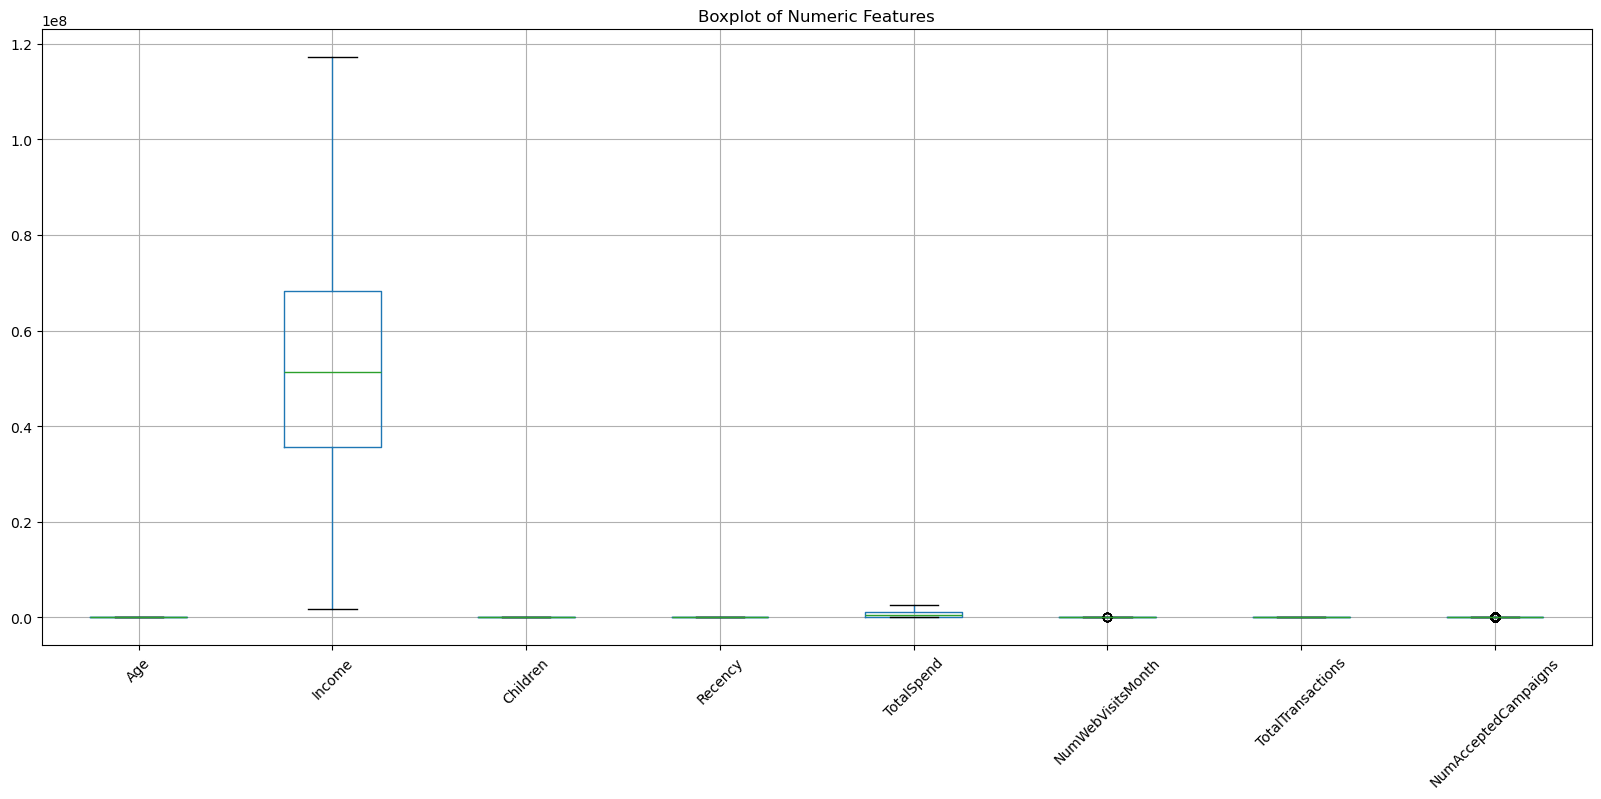

In [50]:
# Visualisasi boxplot pada fitur-fitur numerik sebelum scaling
plt.figure(figsize=(20, 8))
df_encoded[numeric_feat].boxplot(rot=45)
plt.title("Boxplot of Numeric Features")
plt.show()

In [51]:
from sklearn.preprocessing import StandardScaler

# Scaling fitur2 numerik dengan StandardScaler
scaler = StandardScaler().set_output(transform="pandas")
df_scaled = scaler.fit_transform(df_encoded[numeric_feat])

# Gabungkan dengan fitur numerik
df_final = pd.concat([df_clean.drop(columns=numeric_feat), df_scaled], axis=1)

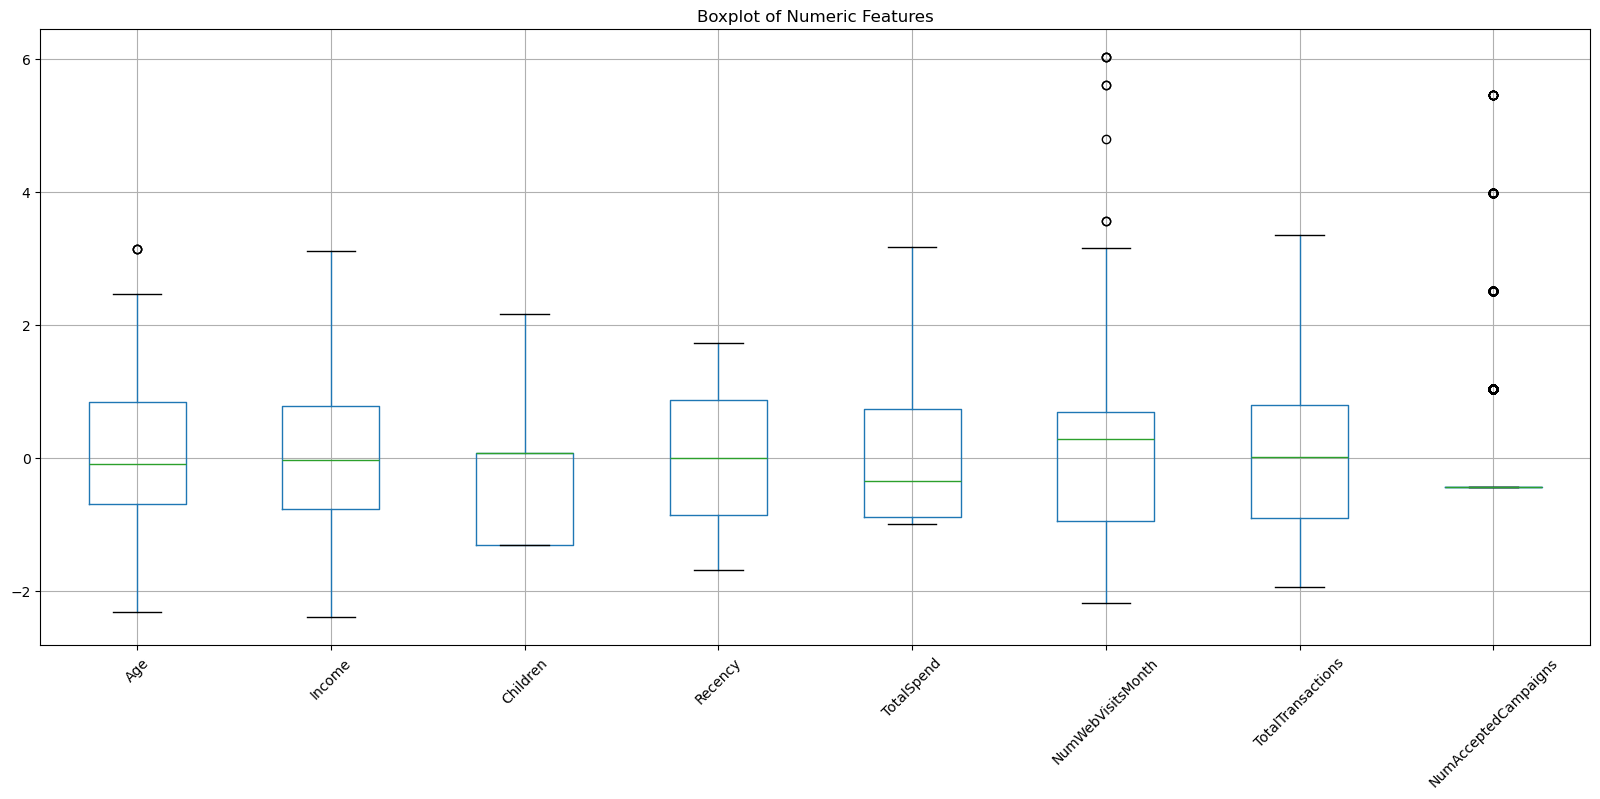

In [52]:
# Visualisasi boxplot pada fitur-fitur numerik setelah scaling
plt.figure(figsize=(20, 8))
df_final[numeric_feat].boxplot(rot=45)
plt.title("Boxplot of Numeric Features")
plt.show()

In [53]:
# Overview stats fitur2 numerik setelah scaling
df_final[numeric_feat].describe().round(3)

,Age,Income,Children,Recency,TotalSpend,NumWebVisitsMonth,TotalTransactions,NumAcceptedCampaigns
count,2057.000,2057.000,2057.000,2057.000,2057.000,2057.000,2057.000,2057.000
mean,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.313,-2.397,-1.310,-1.690,-0.998,-2.180,-1.942,-0.443
25%,-0.695,-0.775,-1.310,-0.862,-0.891,-0.950,-0.897,-0.443
50%,-0.099,-0.027,0.079,0.001,-0.349,0.279,0.018,-0.443
75%,0.838,0.780,0.079,0.864,0.731,0.689,0.802,-0.443
max,3.137,3.113,2.162,1.726,3.165,6.019,3.350,5.454


# Modeling

In [54]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, QuantileTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Define X
X = df_clean.drop(['Complain', 'Recency', 'NumWebVisitsMonth', 
             'SpendingGroup', 'TransactionGroup', 'AgeGroup', 
             'IncomeGroup', 'Dt_Customer', 'Z_CostContact', 
             'Z_Revenue', 'Response', 'ConversionRate'], axis=1)
print(f"Used columns: {X.columns.to_list()}")

# Create columntransformer
nominal_col = ['Marital_Status']
ordinal_col = ['Education']
ordinal_cat = [['SMA', 'D3', 'S1', 'S2', 'S3']]
numerical_col = [col for col in X.select_dtypes(include=['float64', 'int64']).columns if col != 'Complain']

preprocessor = ColumnTransformer(transformers=[
    ('nominal', OneHotEncoder(sparse_output=False), nominal_col),
    ('ordinal', OrdinalEncoder(categories=ordinal_cat), ordinal_col),
    ('scaler', QuantileTransformer(output_distribution='normal', random_state=42), numerical_col)
], remainder='passthrough')

# Pipeline
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=2, random_state=0)),
    ('kmeans', KMeans(random_state=42))
])

Used columns: ['Education', 'Marital_Status', 'Income', 'Age', 'Children', 'TotalSpend', 'NumAcceptedCampaigns', 'TotalTransactions']


Elbow Method to determine the number of clusters to be formed:


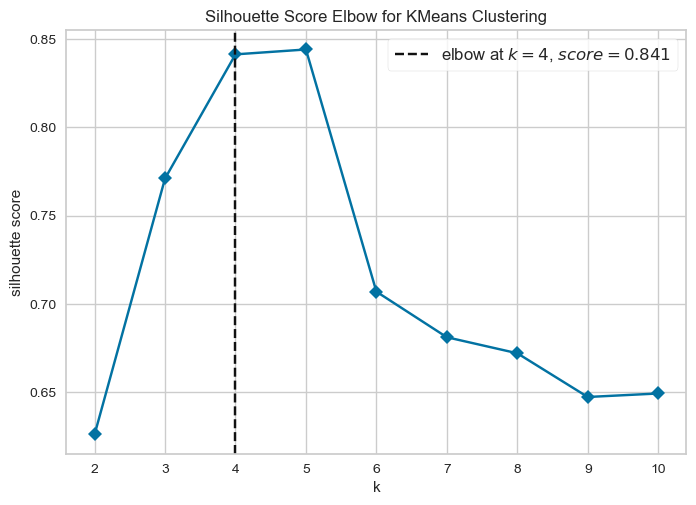

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [55]:
from yellowbrick.cluster import KElbowVisualizer

# Transform Data
X_transformed = pipe['preprocessor'].fit_transform(X)
X_elbow = pipe['pca'].fit_transform(X_transformed)

# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(pipe.named_steps['kmeans'], k=10, metric='silhouette', timings=False)
Elbow_M.fit(X_elbow)
Elbow_M.show()

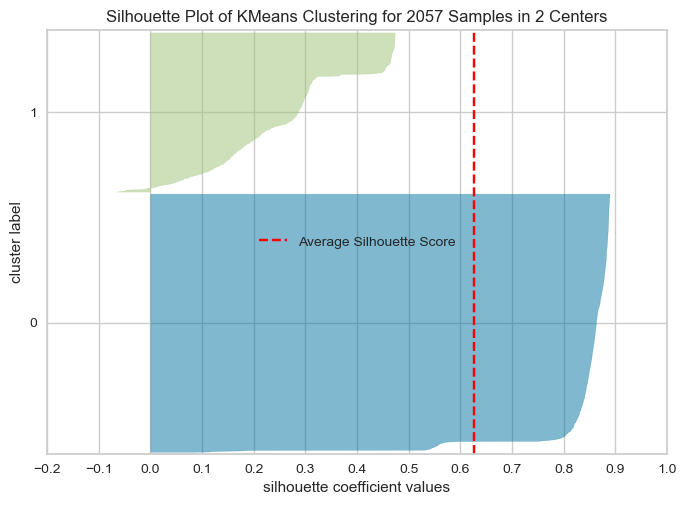

,estimator,KMeans(n_clus...ndom_state=42)
,ax,<Axes: title=...luster label'>
,colors,'yellowbrick'
,is_fitted,'auto'
,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42


In [56]:
from yellowbrick.cluster import silhouette_visualizer

# Use the quick method and immediately show the figure
silhouette_visualizer(KMeans(2, random_state=42), X_elbow, colors='yellowbrick')

For n_clusters = 2 The average silhouette_score is : 0.623190449111039
For n_clusters = 3 The average silhouette_score is : 0.7711095749347052
For n_clusters = 4 The average silhouette_score is : 0.8413777980261817
For n_clusters = 5 The average silhouette_score is : 0.6993548683655019
For n_clusters = 6 The average silhouette_score is : 0.658870452624457
For n_clusters = 7 The average silhouette_score is : 0.6667702253380191
For n_clusters = 8 The average silhouette_score is : 0.6980295999773417
For n_clusters = 9 The average silhouette_score is : 0.6585790743331483
For n_clusters = 10 The average silhouette_score is : 0.6558252976526122


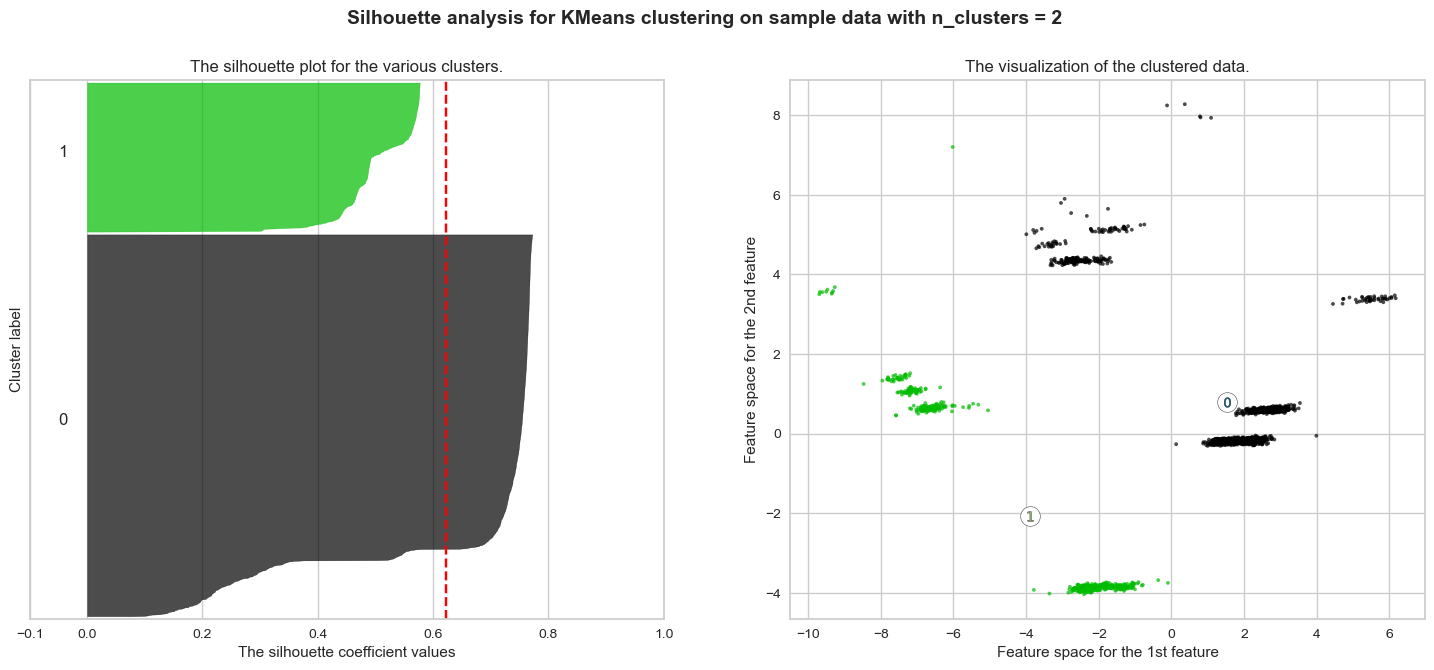

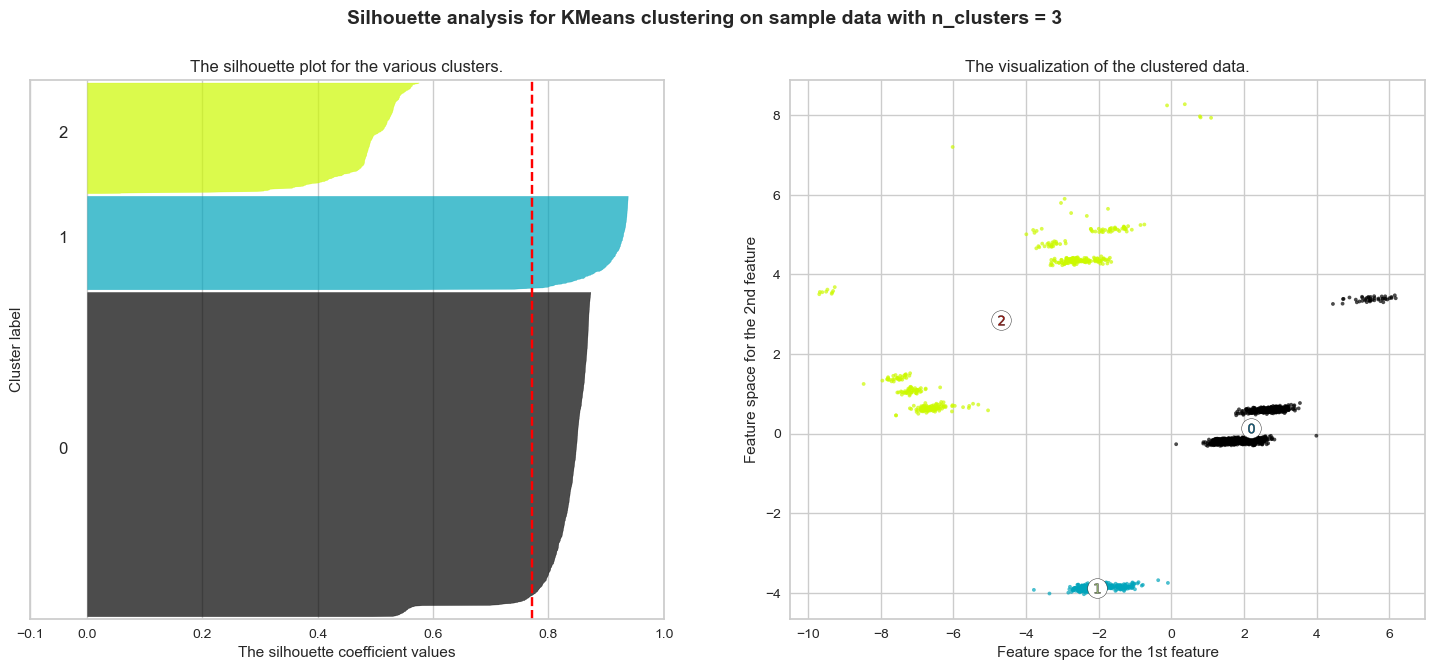

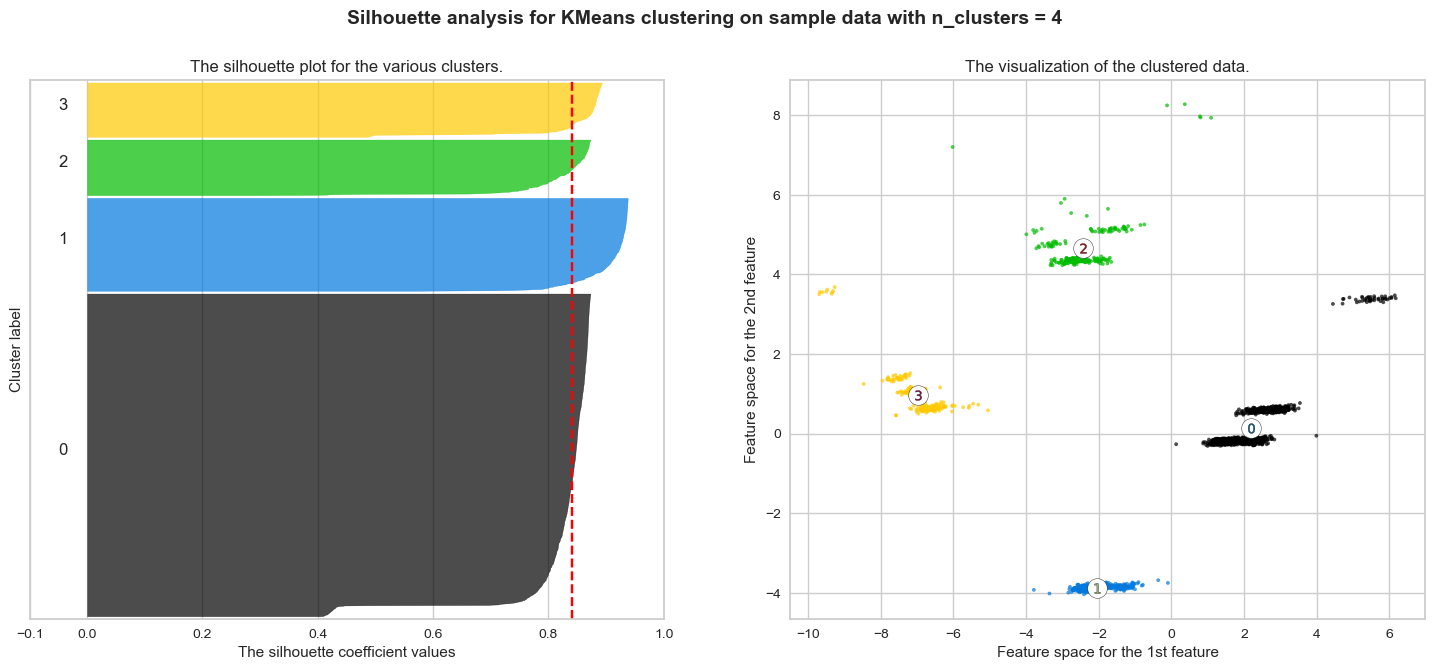

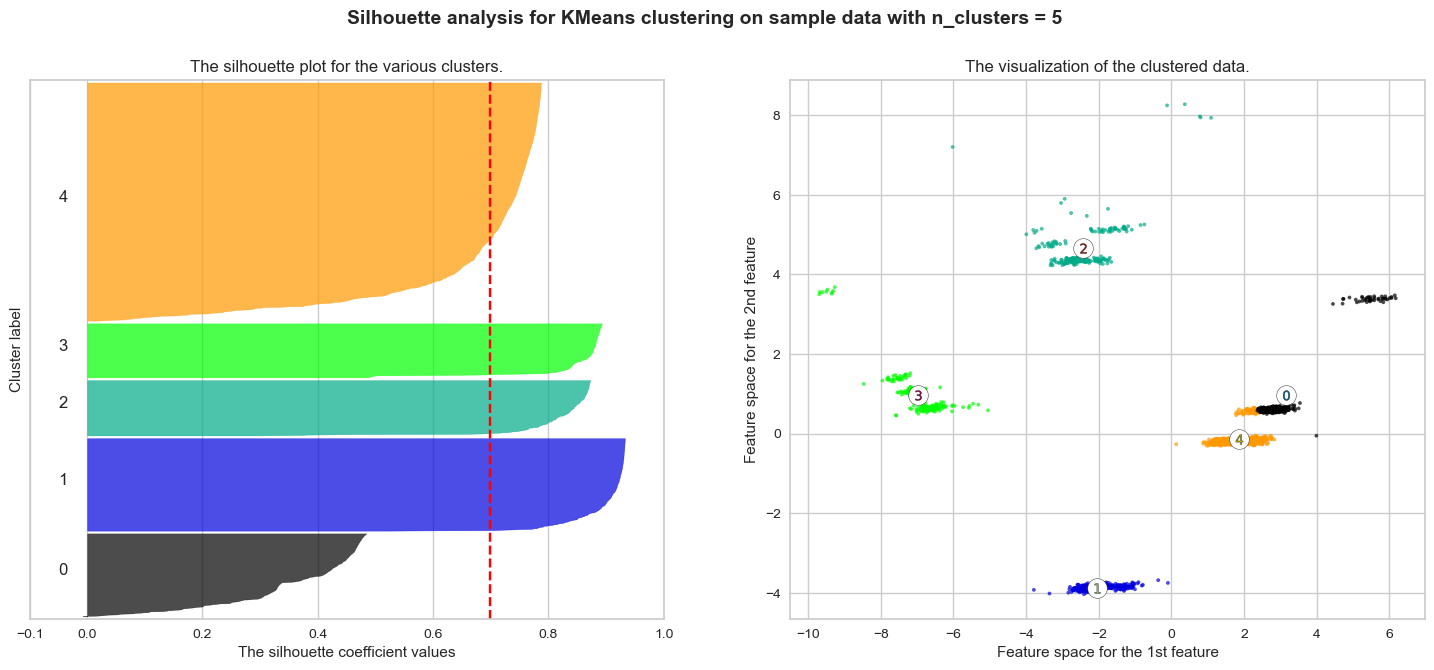

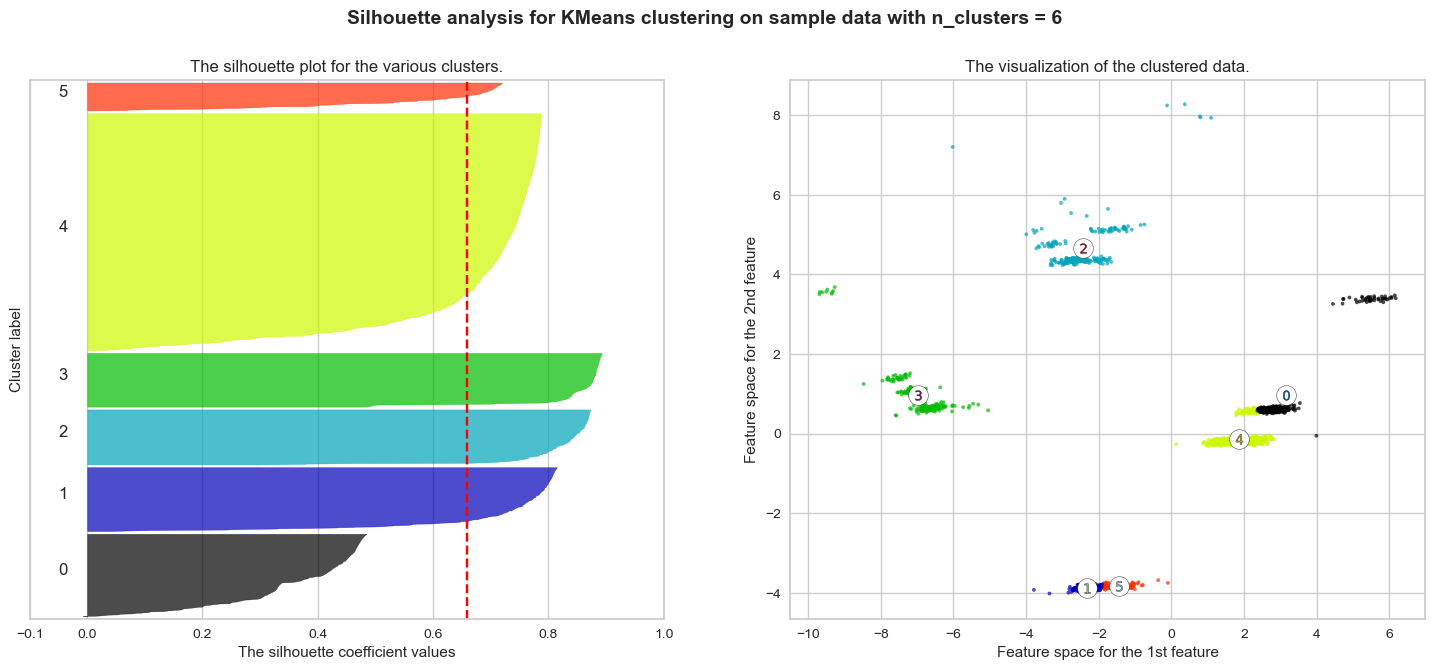

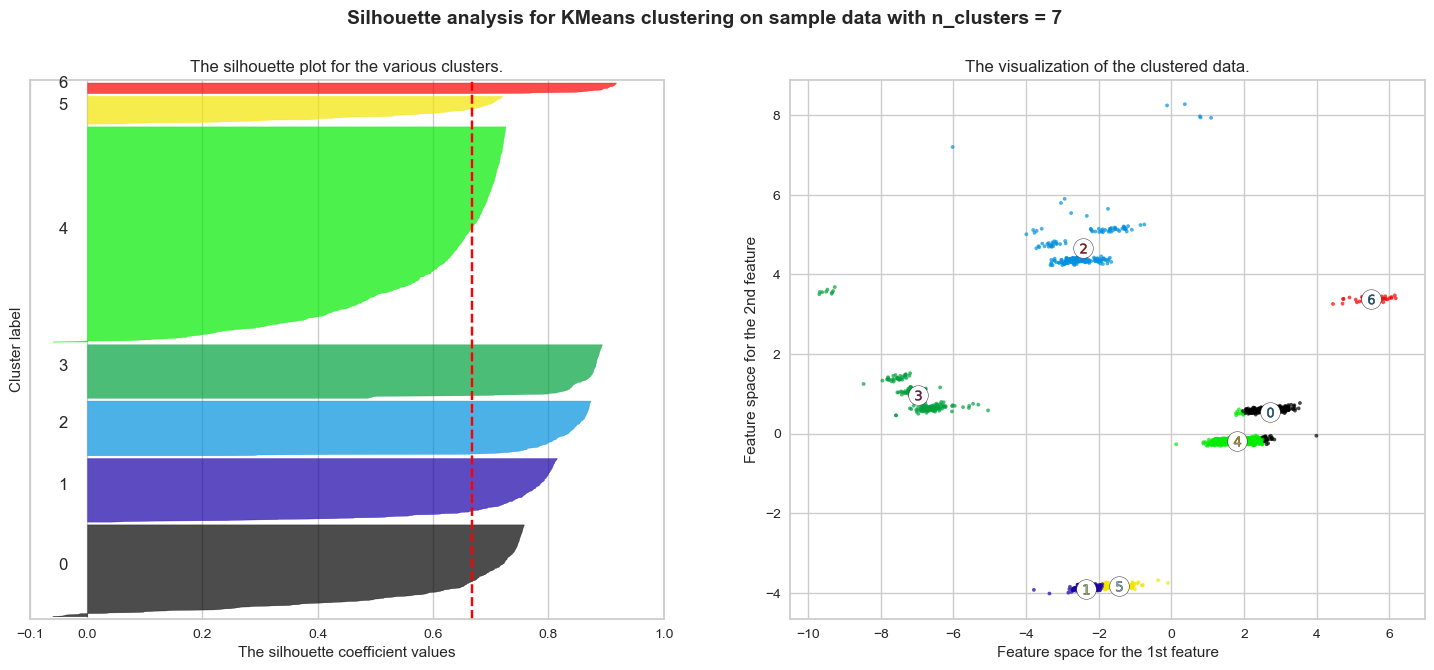

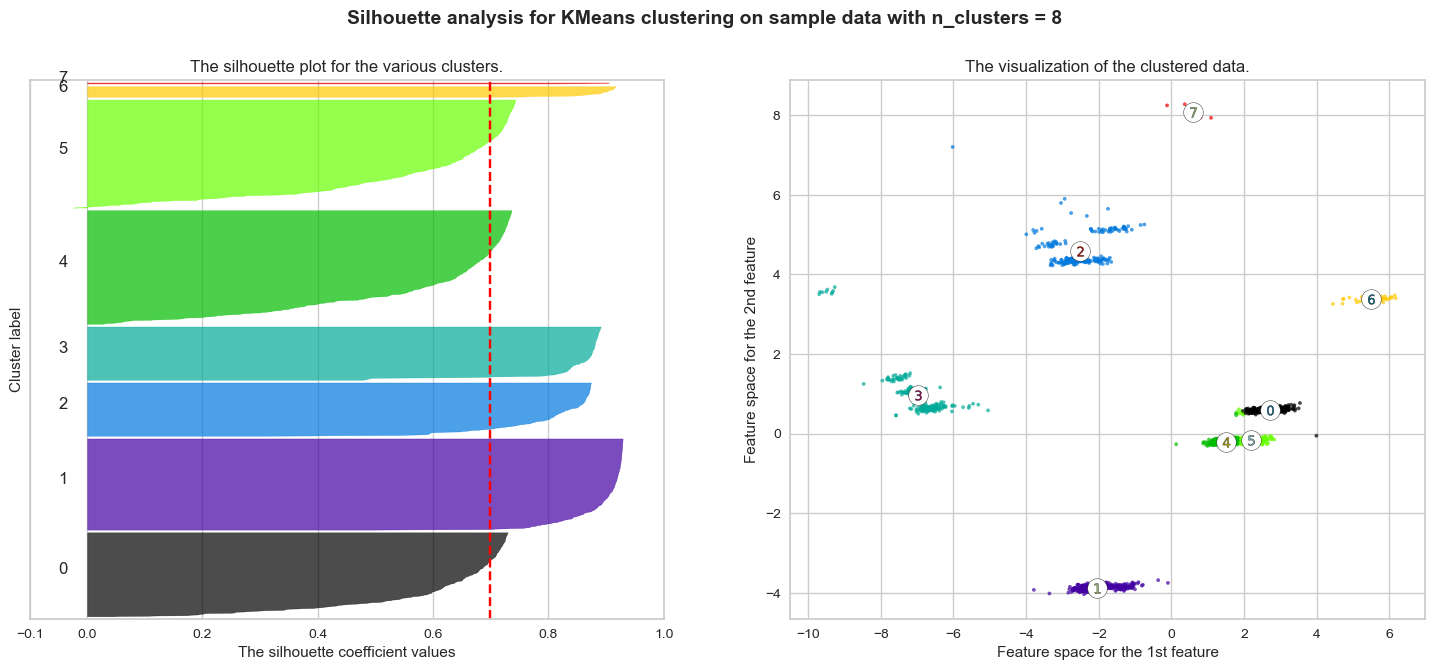

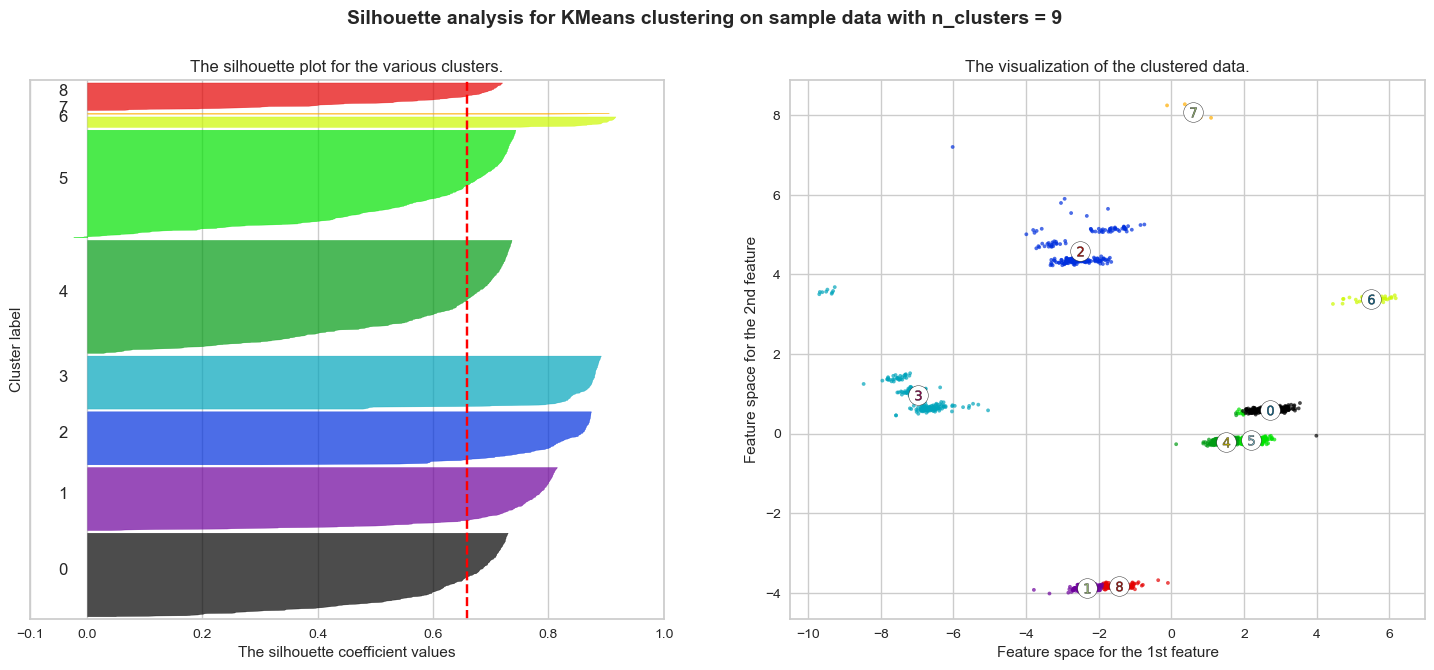

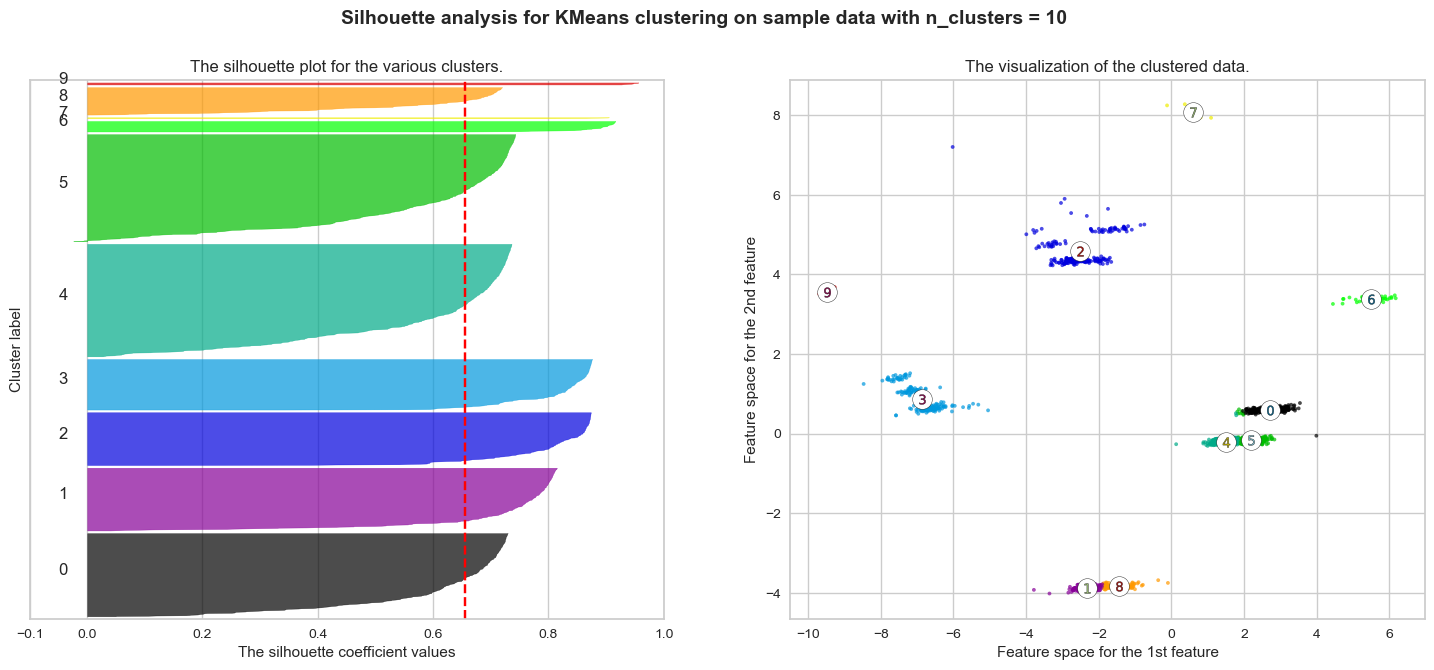

In [57]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Transform Data
X_transformed = pipe['preprocessor'].fit_transform(X)
X_silhoutte = pipe['pca'].fit_transform(X_transformed)

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_silhoutte) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_silhoutte)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_silhoutte, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_silhoutte, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X_silhoutte[:, 0], X_silhoutte[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [58]:
# Change kmeans clusters from the pipeline based on the best score
pipe['kmeans'].n_clusters = 4

# Perform clustering on PCA space
cluster_labels = pipe.fit_predict(X)

# Assign labels back to original dataset
final_df = X.copy()
final_df['cluster'] = cluster_labels

In [59]:
final_df.sample(5)

,Education,Marital_Status,Income,Age,Children,TotalSpend,NumAcceptedCampaigns,TotalTransactions,cluster
1439,S1,Menikah,58597000.0,49,2.0,733000,0,32.0,0
1590,S1,Menikah,61064000.0,49,1.0,1080000,0,28.0,0
1212,S1,Bertunangan,19656000.0,55,1.0,84000,0,9.0,0
862,S2,Lajang,68092000.0,47,0.0,1281000,0,20.0,2
1924,S2,Janda,51381500.0,82,0.0,1564000,1,22.0,1


# Model Interpretation

## `Cluster` distribution

In [60]:
cluster_summary = final_df.groupby('cluster').agg({
    'Income': 'median',
    'TotalSpend': 'median',
    'TotalTransactions': 'median',
    'Age': 'median',
    'Children': 'median',
    'NumAcceptedCampaigns': 'median',
    'Education': lambda x: x.mode()[0],
    'Marital_Status': lambda x: x.mode()[0],
    'cluster': 'count'
}).rename(columns={'cluster': 'Count'}).reset_index()

cluster_summary['% of Total'] = (cluster_summary['Count'] / len(final_df) * 100).round(2)

cluster_summary.sort_values('cluster')

,cluster,Income,TotalSpend,TotalTransactions,Age,Children,NumAcceptedCampaigns,Education,Marital_Status,Count,% of Total
0,0,44511500.0,157000.0,11.0,54.0,1.0,0.0,S1,Menikah,1262,61.35
1,1,79908000.0,1572000.0,21.0,55.0,0.0,1.0,S1,Menikah,213,10.35
2,2,67939000.0,989000.0,17.0,56.0,0.0,0.0,S1,Menikah,364,17.70
3,3,55472500.0,565000.0,18.0,56.0,1.0,1.0,S1,Menikah,218,10.60


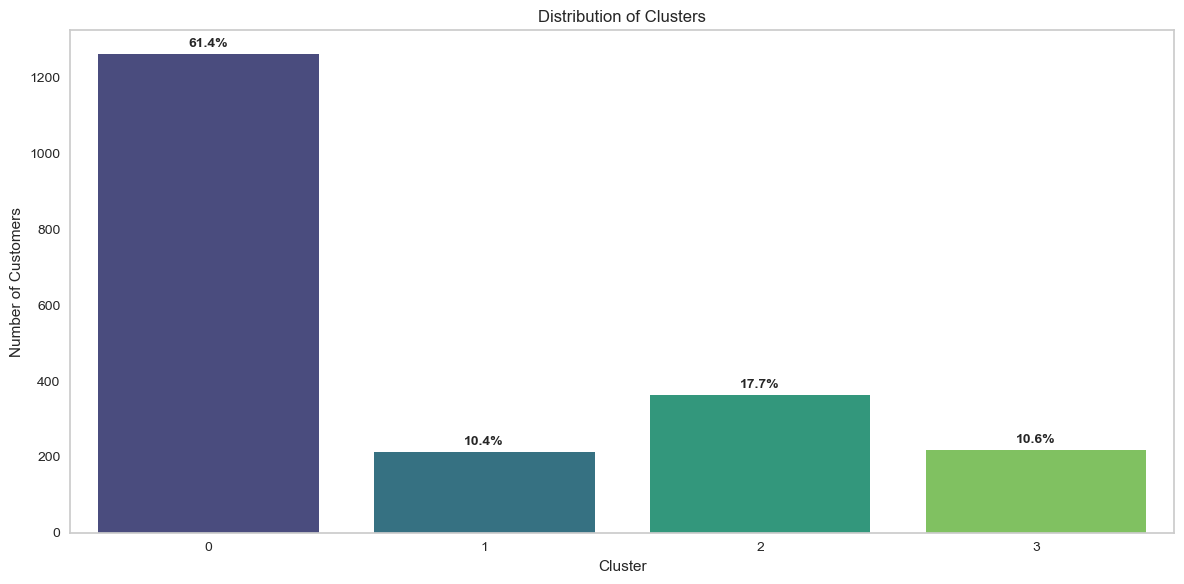

In [95]:
cluster_counts = final_df['cluster'].value_counts().sort_index()
cluster_percent = (cluster_counts / cluster_counts.sum()) * 100

# Plot: Ukuran tiap cluster
plt.figure(figsize=(12, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")

# Tambahkan label persentase di atas bar
for i, (count, percent) in enumerate(zip(cluster_counts.values, cluster_percent.values)):
    plt.text(i, count + 10, f"{percent:.1f}%", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Distribution of Clusters")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.grid(False)
plt.tight_layout()
plt.show()

## Categorical Features

In [62]:
categorical_cols = ['Marital_Status', 'Education']

# Calculate descriptive statistics for each cluster
cluster_summary = final_df.groupby('cluster')[categorical_cols].describe()
cluster_summary

Marital_Status                      Education                
                 count unique      top freq     count unique top freq
cluster                                                              
0                 1262      6  Menikah  498      1262      5  S1  631
1                  213      5  Menikah   77       213      5  S1  106
2                  364      5  Menikah  128       364      5  S1  184
3                  218      6  Menikah   92       218      5  S1  109

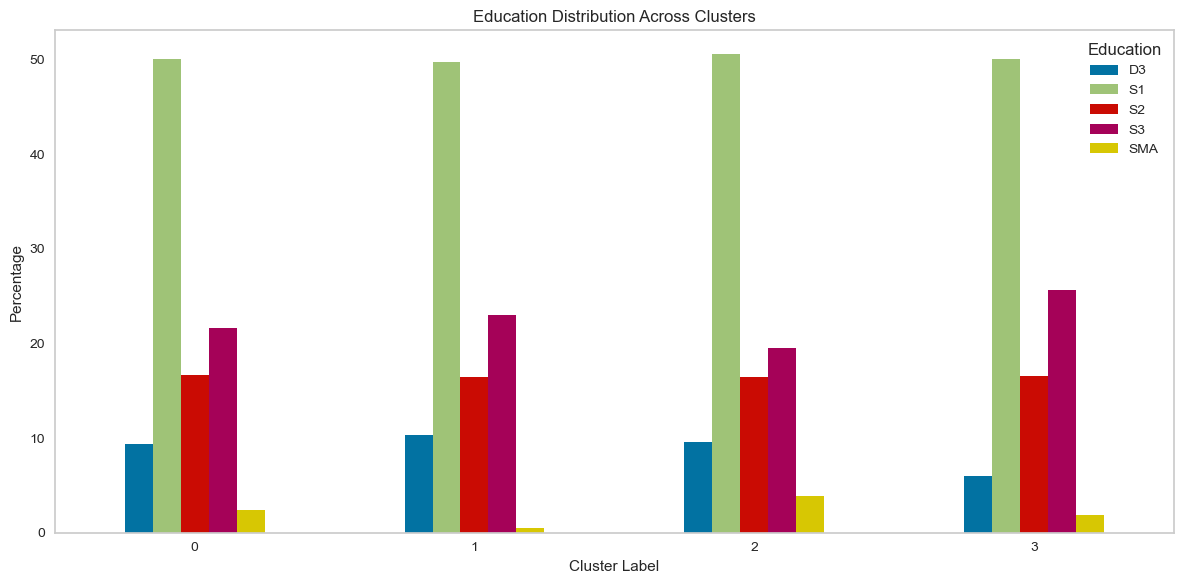

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df' and contains a 'cluster_label' column
# Create a cross-tabulation of cluster labels and a categorical variable
education_cross_tab = pd.crosstab(final_df['cluster'], final_df['Education'], normalize='index') * 100

# Plot the stacked bar chart
education_cross_tab.plot(kind='bar', figsize=(12, 6))
plt.title('Education Distribution Across Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Education')
plt.tight_layout()
plt.grid(False)
plt.show()

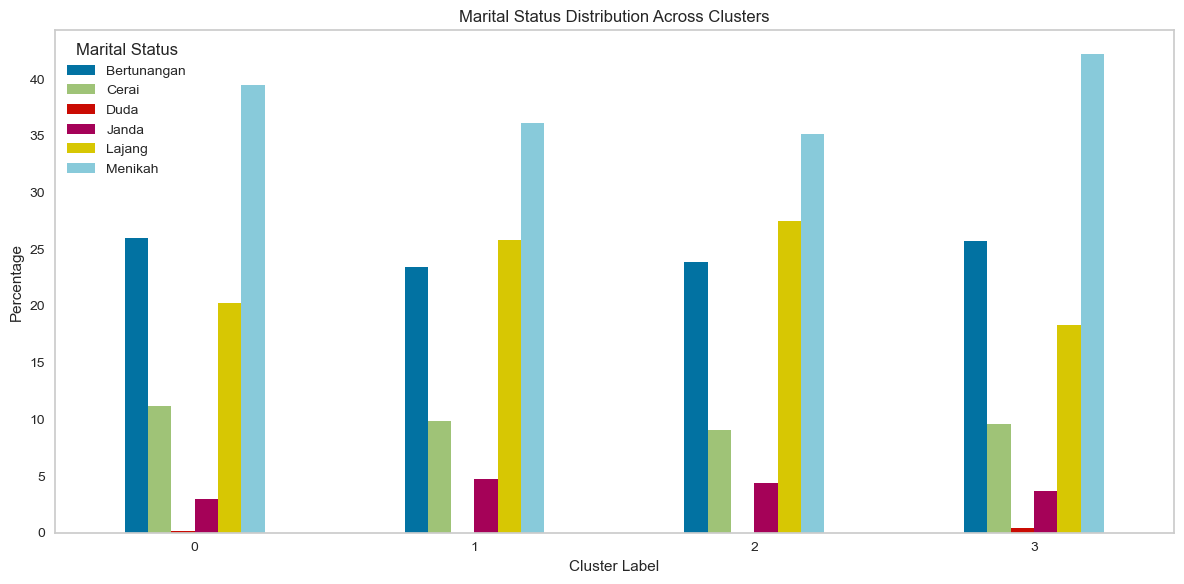

In [64]:
# Repeat for 'Marital_Status'
marital_status_cross_tab = pd.crosstab(final_df['cluster'], final_df['Marital_Status'], normalize='index') * 100

marital_status_cross_tab.plot(kind='bar', figsize=(12, 6))
plt.title('Marital Status Distribution Across Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Marital Status')
plt.grid(False)
plt.tight_layout()
plt.show()

## Numerical Features

In [65]:
# Assuming your DataFrame is named 'df'
numerical_cols = ['Income', 'TotalSpend', 'TotalTransactions', 'Children', 'NumAcceptedCampaigns', 'Age']

# Calculate descriptive statistics for each cluster
cluster_summary = final_df.groupby('cluster')[numerical_cols].describe()
cluster_summary

Income                                                      \
          count          mean           std         min         25%   
cluster                                                               
0        1262.0  4.526896e+07  1.714230e+07   2447000.0  33071250.0   
1         213.0  7.651012e+07  1.518797e+07  14421000.0  72066000.0   
2         364.0  5.972166e+07  2.379619e+07   1730000.0  41015750.0   
3         218.0  5.357771e+07  1.796173e+07   5648000.0  40475250.0   

                                             TotalSpend                \
                50%         75%          max      count          mean   
cluster                                                                 
0        44511500.0  57929250.0  117133500.0     1262.0  3.566220e+05   
1        79908000.0  84865000.0  105471000.0      213.0  1.499662e+06   
2        67939000.0  77867750.0  117133500.0      364.0  8.989423e+05   
3        55472500.0  65302250.0   94871000.0      218.0  6.903073e+05   

                                                                             \
                   std      min        25%        50%        75%        max   
cluster                                                                       
0        410142.735166   5000.0    51250.0   157000.0   573750.0  2092000.0   
1        524789.758721  16000.0  1196000.0  1572000.0  1853000.0  2514000.0   
2        598310.062214   6000.0   293750.0   989000.0  1336500.0  2440000.0   
3        549641.325898  12000.0   184000.0   565000.0  1064750.0  2194000.0   

        TotalTransactions                                                      \
                    count       mean       std  min    25%   50%    75%   max   
cluster                                                                         
0                  1262.0  13.166799  7.637408  0.0   7.00  11.0  19.00  40.5   
1                   213.0  20.140845  4.976252  1.0  17.00  21.0  23.00  30.0   
2                   364.0  16.251374  6.916314  0.0  11.75  17.0  21.00  40.5   
3                   218.0  17.220183  7.684874  2.0  11.25  18.0  22.75  35.0   

        Children                                               \
           count      mean       std  min  25%  50%  75%  max   
cluster                                                         
0         1262.0  1.323693  0.494635  1.0  1.0  1.0  2.0  2.5   
1          213.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
2          364.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
3          218.0  1.236239  0.445581  1.0  1.0  1.0  1.0  2.5   

        NumAcceptedCampaigns                                               \
                       count      mean       std  min  25%  50%  75%  max   
cluster                                                                     
0                     1262.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
1                      213.0  1.671362  0.887532  1.0  1.0  1.0  2.0  4.0   
2                      364.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
3                      218.0  1.201835  0.503990  1.0  1.0  1.0  1.0  4.0   

            Age                                                       
          count       mean        std   min   25%   50%    75%   max  
cluster                                                               
0        1262.0  55.853407  10.562449  33.0  48.0  54.0  64.00  93.0  
1         213.0  56.164319  14.722472  29.0  43.0  55.0  69.00  93.0  
2         364.0  56.730769  14.193237  29.0  45.0  56.0  68.00  85.0  
3         218.0  57.018349  10.396279  33.0  50.0  56.0  65.75  79.0

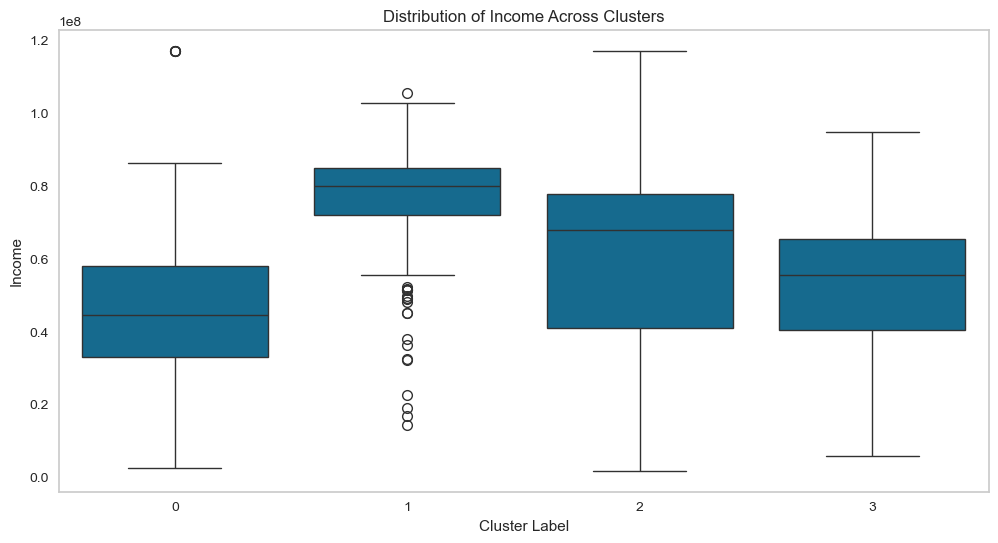

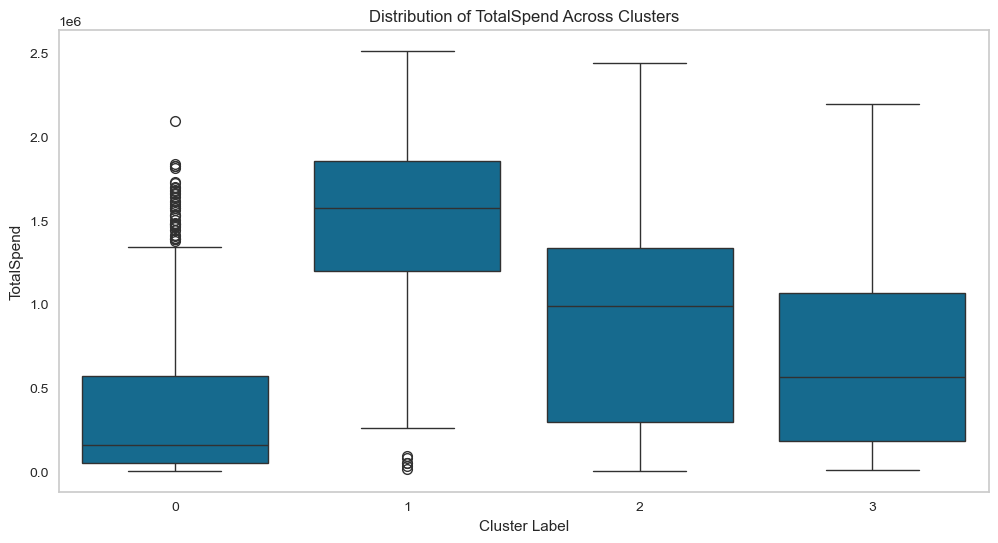

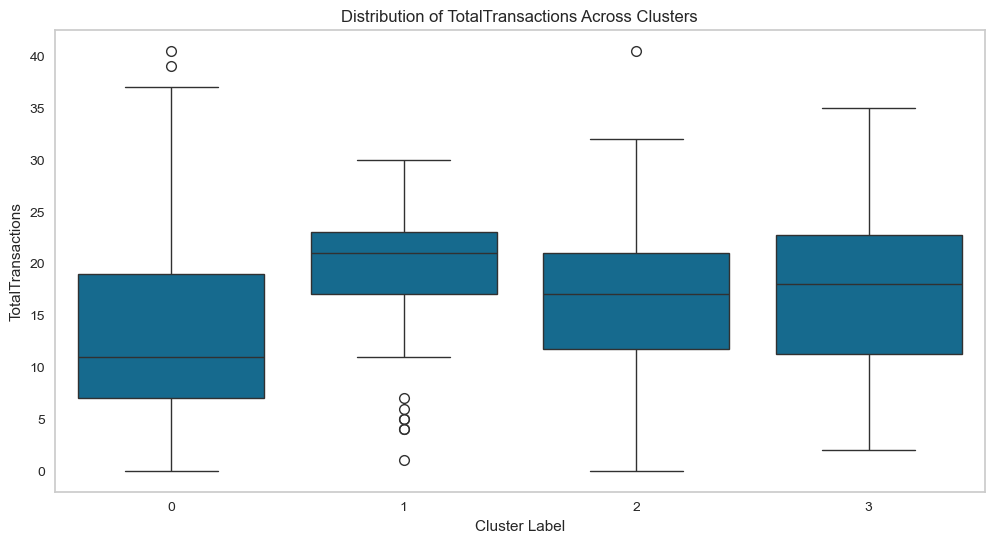

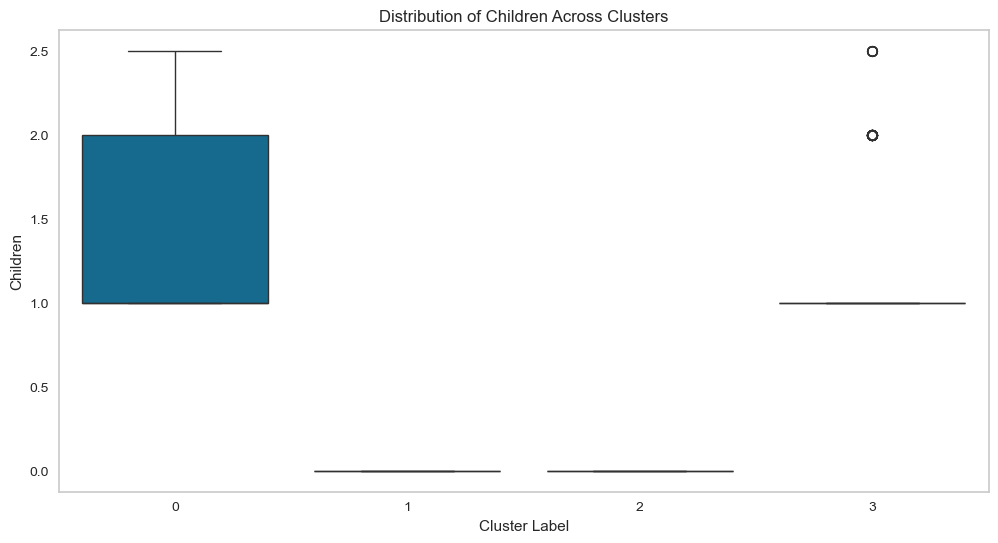

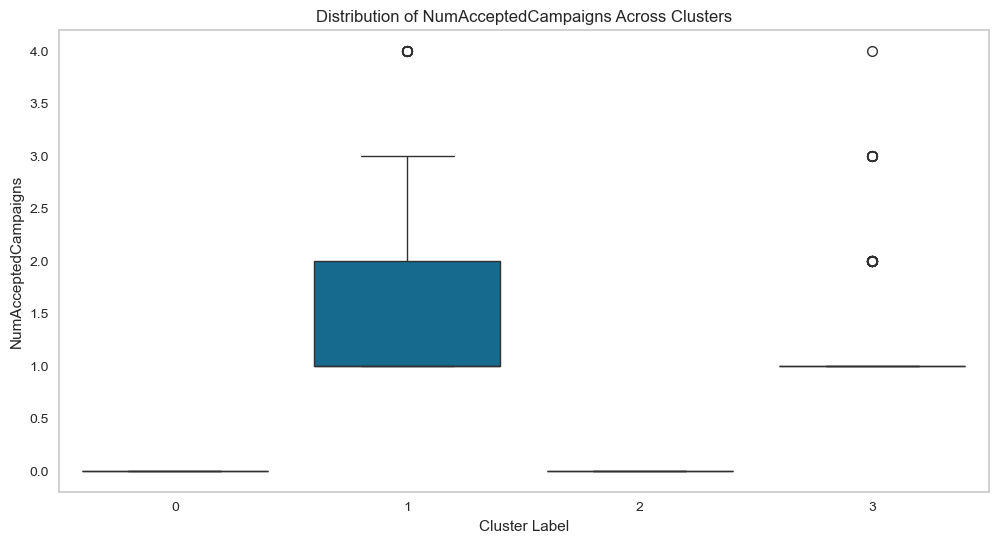

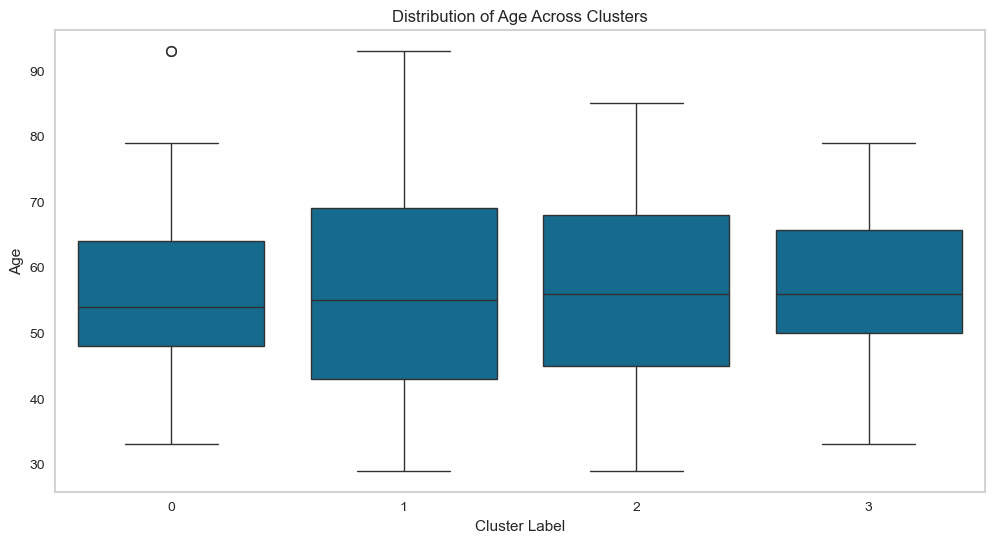

In [66]:
# Visualize the distributions with box plots
for col in numerical_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='cluster', y=col, data=final_df)
    plt.title(f'Distribution of {col} Across Clusters')
    plt.xlabel('Cluster Label')
    plt.ylabel(col)
    plt.grid(False)
    plt.show()

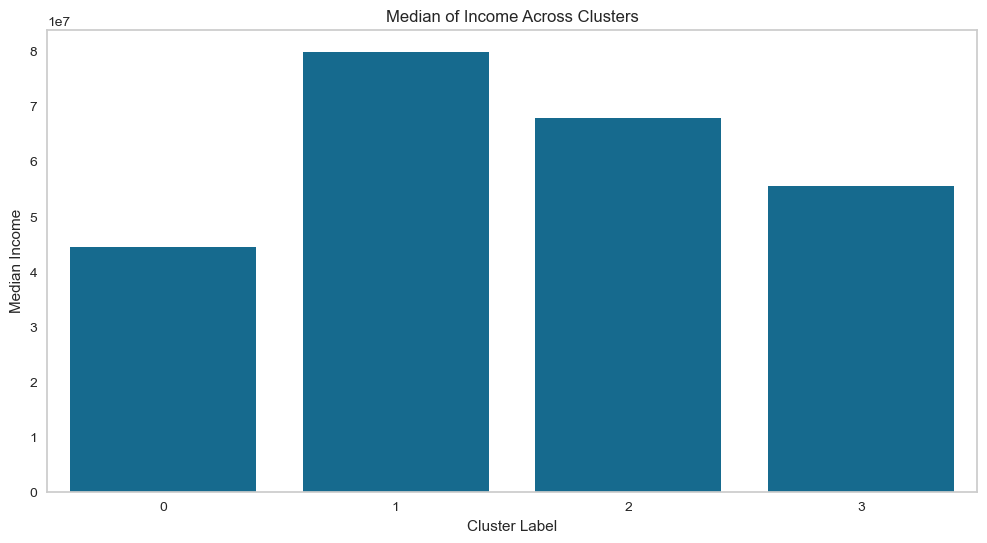

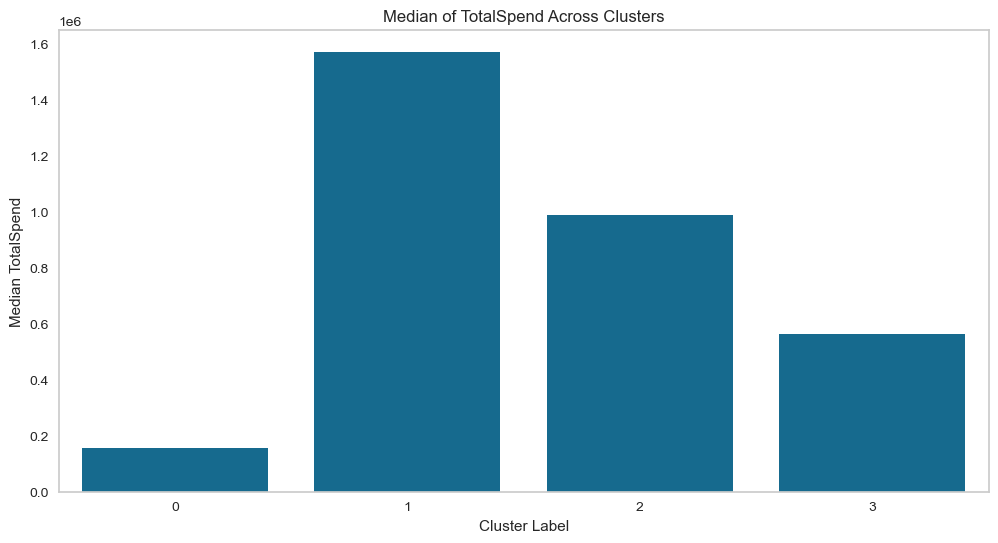

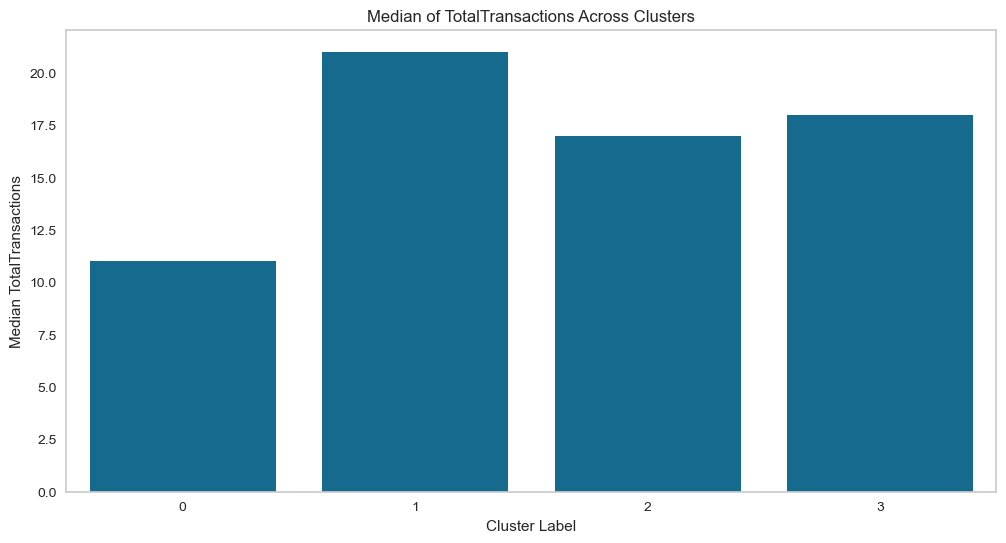

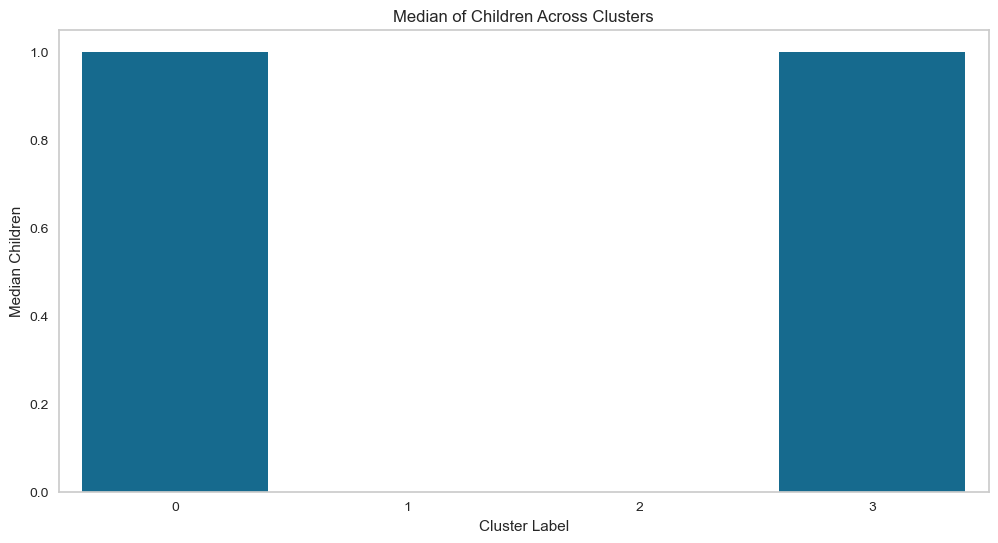

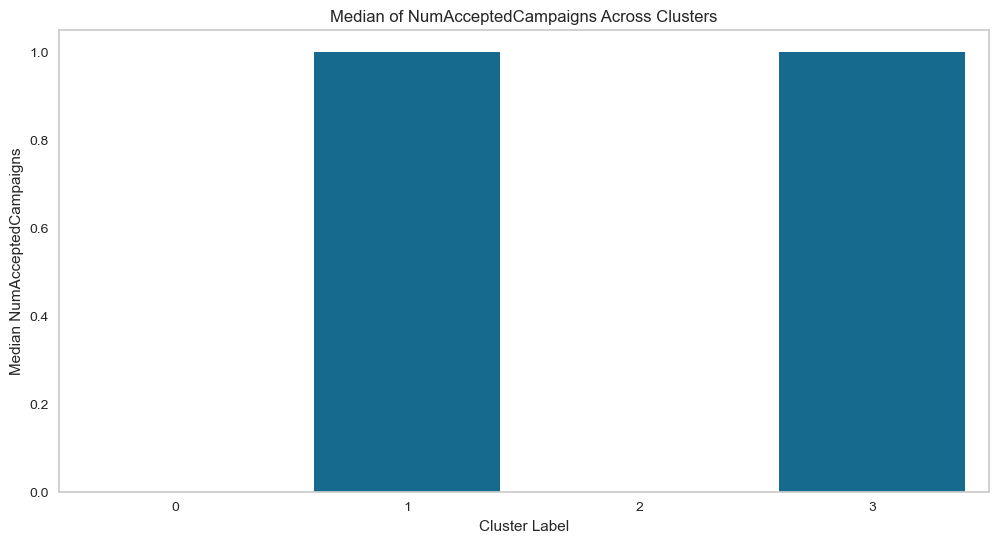

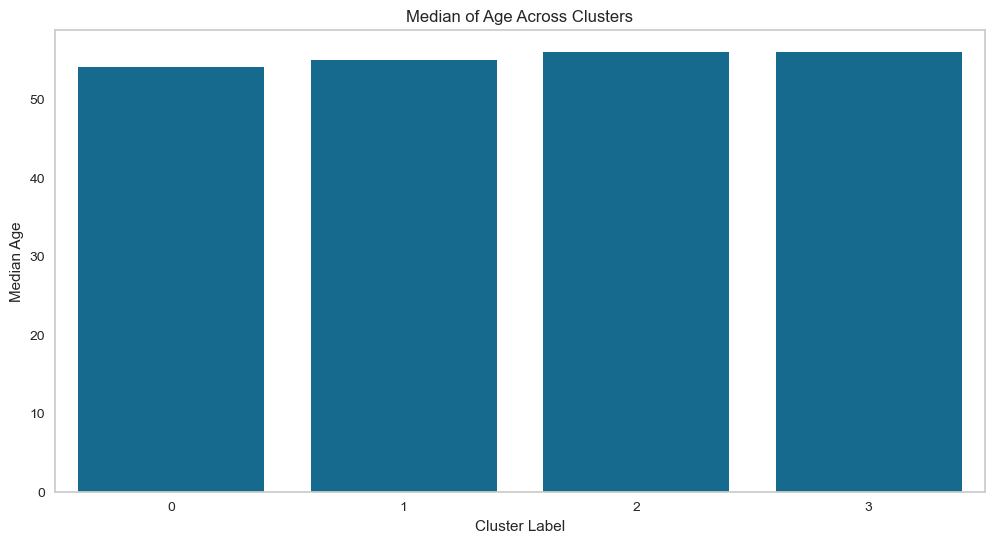

In [67]:
# Visualize the distributions with bar plots
for col in numerical_cols:
    num_med = final_df.groupby('cluster')[col].median().reset_index()
    plt.figure(figsize=(12, 6))
    sns.barplot(x='cluster', y=col, data=num_med)
    plt.title(f'Median of {col} Across Clusters')
    plt.xlabel('Cluster Label')
    plt.ylabel(f'Median {col}')
    plt.grid(False)
    plt.show()

## Assign New Cluster

In [68]:
# Assign labels back to original dataset
df['cluster'] = cluster_labels

In [69]:
df['cluster'] = df['cluster'].replace({0: 'Risk of Churn', 1: 'High-spender', 3: 'Low-spender',  2: 'Mid-spender'})
df['Children'] = df['Children'].replace({2.5: 3}).astype('int')

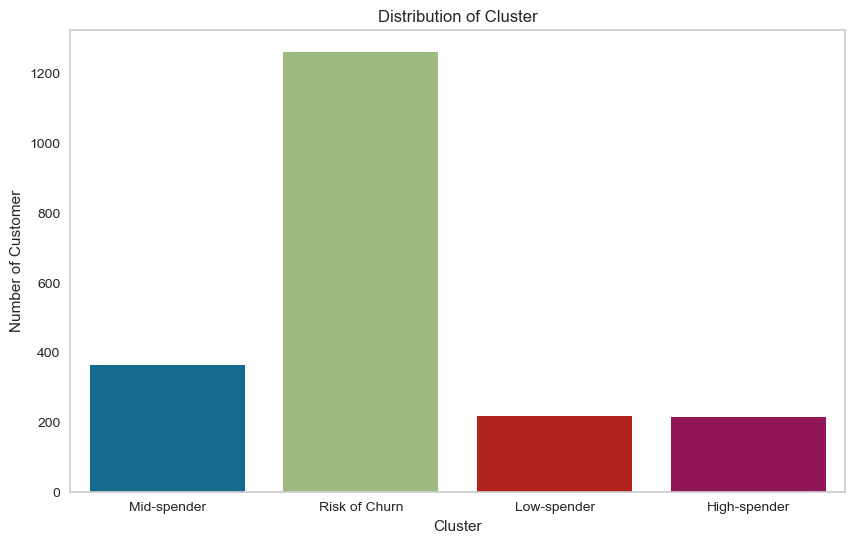

In [71]:
plt.figure(figsize=(10,6))
sns.countplot(x='cluster', hue='cluster', data=df)
plt.title("Distribution of Cluster")
plt.ylabel('Number of Customer')
plt.xlabel('Cluster')
plt.grid(False)
plt.show()

## `Cluster` vs `AgeGroup`

In [72]:
df.groupby('AgeGroup')['cluster'].count().reset_index()

,AgeGroup,cluster
0,Young Adults (<30),2
1,Adults (30-45),387
2,Middle Age (46-60),948
3,Seniors (>60),720


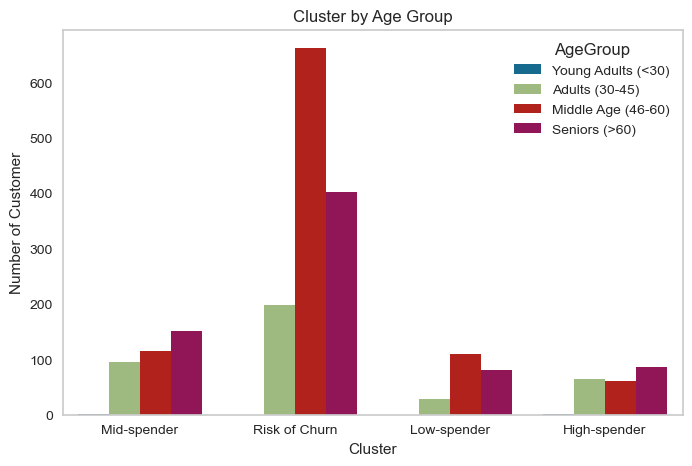

In [73]:
# Hubungan Cluster dengan AgeGroup
plt.figure(figsize=(8,5))
sns.countplot(x='cluster', hue='AgeGroup', data=df)
plt.title("Cluster by Age Group")
plt.ylabel('Number of Customer')
plt.xlabel('Cluster')
plt.grid(False)
plt.show()

## `Cluster` vs `AgeGroup`

In [74]:
df.groupby('IncomeGroup')['cluster'].count().reset_index()

,IncomeGroup,cluster
0,Very Low,412
1,Low,411
2,Medium,411
3,High,411
4,Very High,412


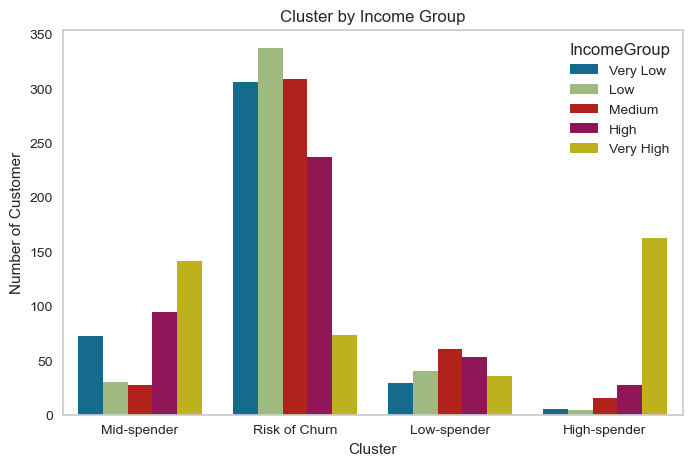

In [75]:
# Hubungan Cluster dengan IncomeGroup
plt.figure(figsize=(8,5))
sns.countplot(x='cluster', hue='IncomeGroup', data=df)
plt.title("Cluster by Income Group")
plt.ylabel('Number of Customer')
plt.xlabel('Cluster')
plt.grid(False)
plt.show()

## `Cluster` vs `IncomeGroup`

In [76]:
df.groupby('IncomeGroup')['cluster'].count().reset_index()

,IncomeGroup,cluster
0,Very Low,412
1,Low,411
2,Medium,411
3,High,411
4,Very High,412


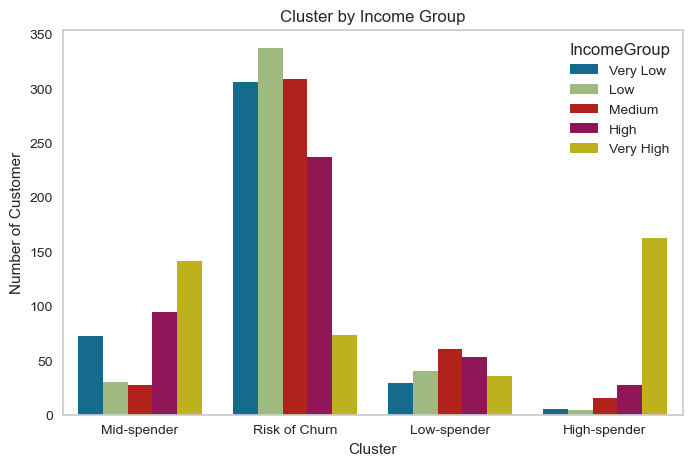

In [77]:
# Hubungan Cluster dengan IncomeGroup
plt.figure(figsize=(8,5))
sns.countplot(x='cluster', hue='IncomeGroup', data=df)
plt.title("Cluster by Income Group")
plt.ylabel('Number of Customer')
plt.xlabel('Cluster')
plt.grid(False)
plt.show()

## `Cluster` vs `Marital_Status`

In [78]:
df.groupby('Marital_Status')['cluster'].count().reset_index()

,Marital_Status,cluster
0,Bertunangan,521
1,Cerai,216
2,Duda,3
3,Janda,71
4,Lajang,451
5,Menikah,795


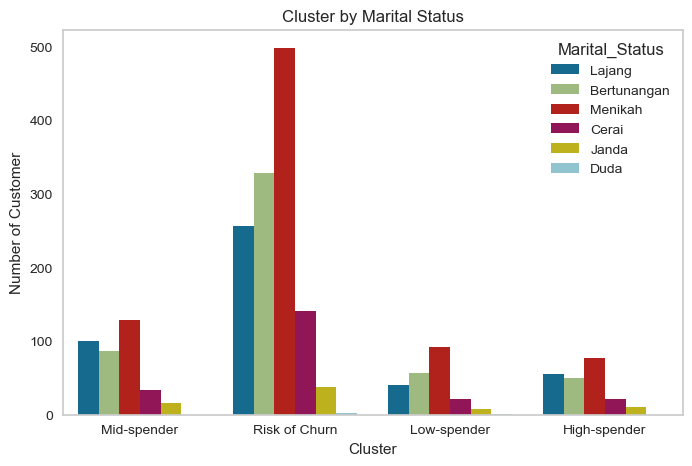

In [79]:
# Hubungan Cluster dengan Marital_Status
plt.figure(figsize=(8,5))
sns.countplot(x='cluster', hue='Marital_Status', data=df)
plt.title("Cluster by Marital Status")
plt.ylabel('Number of Customer')
plt.xlabel('Cluster')
plt.grid(False)
plt.show()

## `Cluster` vs `Children`

In [96]:
df['Children'].value_counts()

Children
1    1044
0     577
2     388
3      48
Name: count, dtype: int64

In [97]:
df.groupby('Children')['cluster'].count().round().reset_index()

,Children,cluster
0,0,577
1,1,1044
2,2,388
3,3,48


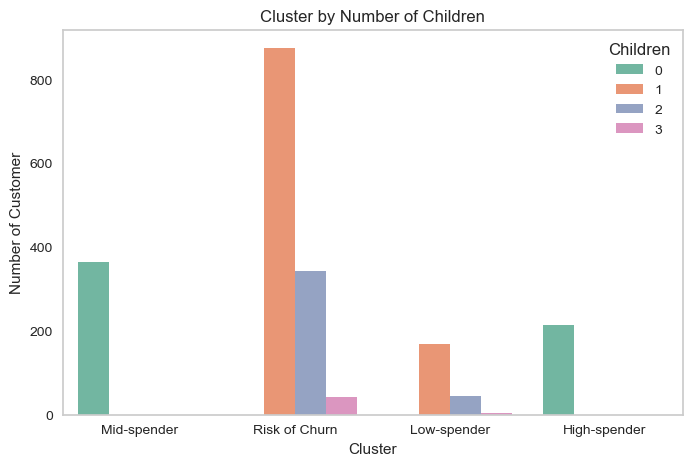

In [98]:
# Hubungan Cluster dengan Children
plt.figure(figsize=(8,5))
sns.countplot(x='cluster', hue='Children', data=df, palette='Set2')
plt.title("Cluster by Number of Children")
plt.xlabel('Cluster')
plt.ylabel('Number of Customer')
plt.grid(False)
plt.show()

## `Cluster` vs `SpendingGroup`

In [83]:
df.groupby('SpendingGroup')['cluster'].count().reset_index()

,SpendingGroup,cluster
0,Very Low,415
1,Low,408
2,Medium,411
3,High,412
4,Very High,411


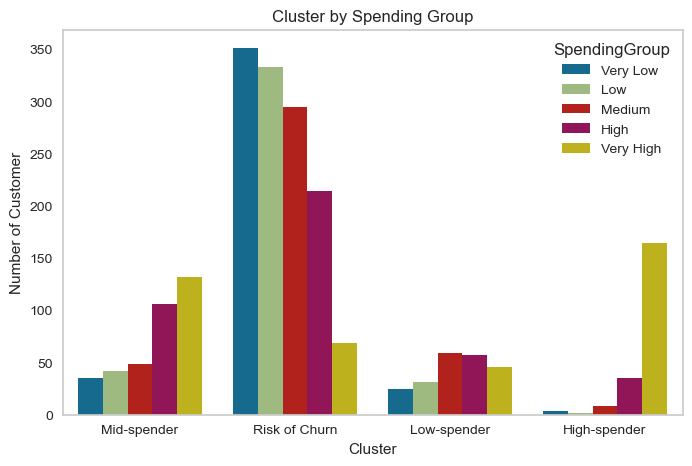

In [84]:
# Hubungan Cluster dengan SpendingGroup
plt.figure(figsize=(8,5))
sns.countplot(x='cluster', hue='SpendingGroup', data=df)
plt.title("Cluster by Spending Group")
plt.xlabel('Cluster')
plt.ylabel('Number of Customer')
plt.grid(False)
plt.show()

## `Cluster` vs `Education`

In [85]:
df.groupby('Education')['cluster'].count().reset_index()

,Education,cluster
0,D3,188
1,S1,1030
2,S2,341
3,S3,449
4,SMA,49


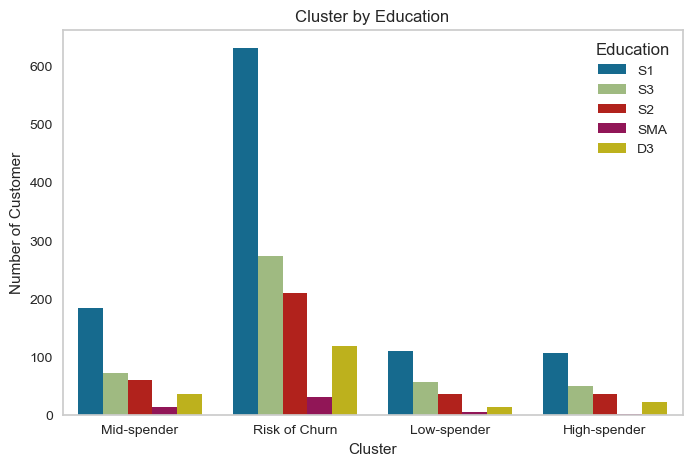

In [86]:
# Hubungan Cluster dengan Education
plt.figure(figsize=(8,5))
sns.countplot(x='cluster', hue='Education', data=df)
plt.title("Cluster by Education")
plt.xlabel('Cluster')
plt.ylabel('Number of Customer')
plt.grid(False)
plt.show()

## `Cluster` vs `TransactionGroup`

In [87]:
df.groupby('TransactionGroup')['cluster'].count().reset_index()

,TransactionGroup,cluster
0,Very Low,508
1,Low,378
2,Medium,365
3,High,421
4,Very High,385


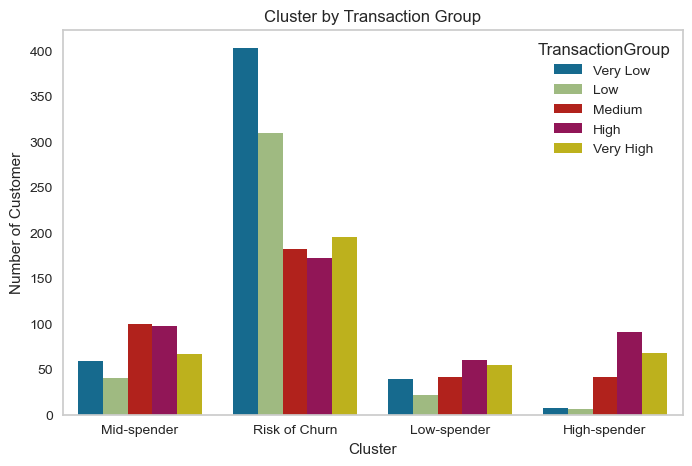

In [88]:
# Hubungan Cluster dengan TransactionGroup
plt.figure(figsize=(8,5))
sns.countplot(x='cluster', hue='TransactionGroup', data=df)
plt.title("Cluster by Transaction Group")
plt.xlabel('Cluster')
plt.ylabel('Number of Customer')
plt.grid(False)
plt.show()

## RFM

In [89]:
# Group by cluster and calculate the median for RFM metrics
rfm_median = df.groupby('cluster').agg({
    'Recency': 'median',
    'TotalTransactions': 'median',
    'TotalSpend': 'median'
}).reset_index()

# Sort by cluster name for consistent plotting
rfm_median = rfm_median.sort_values('cluster')

rfm_median

,cluster,Recency,TotalTransactions,TotalSpend
0,High-spender,47.0,21.0,1572000.0
1,Low-spender,47.5,18.0,565000.0
2,Mid-spender,49.0,17.0,989000.0
3,Risk of Churn,50.0,11.0,157000.0


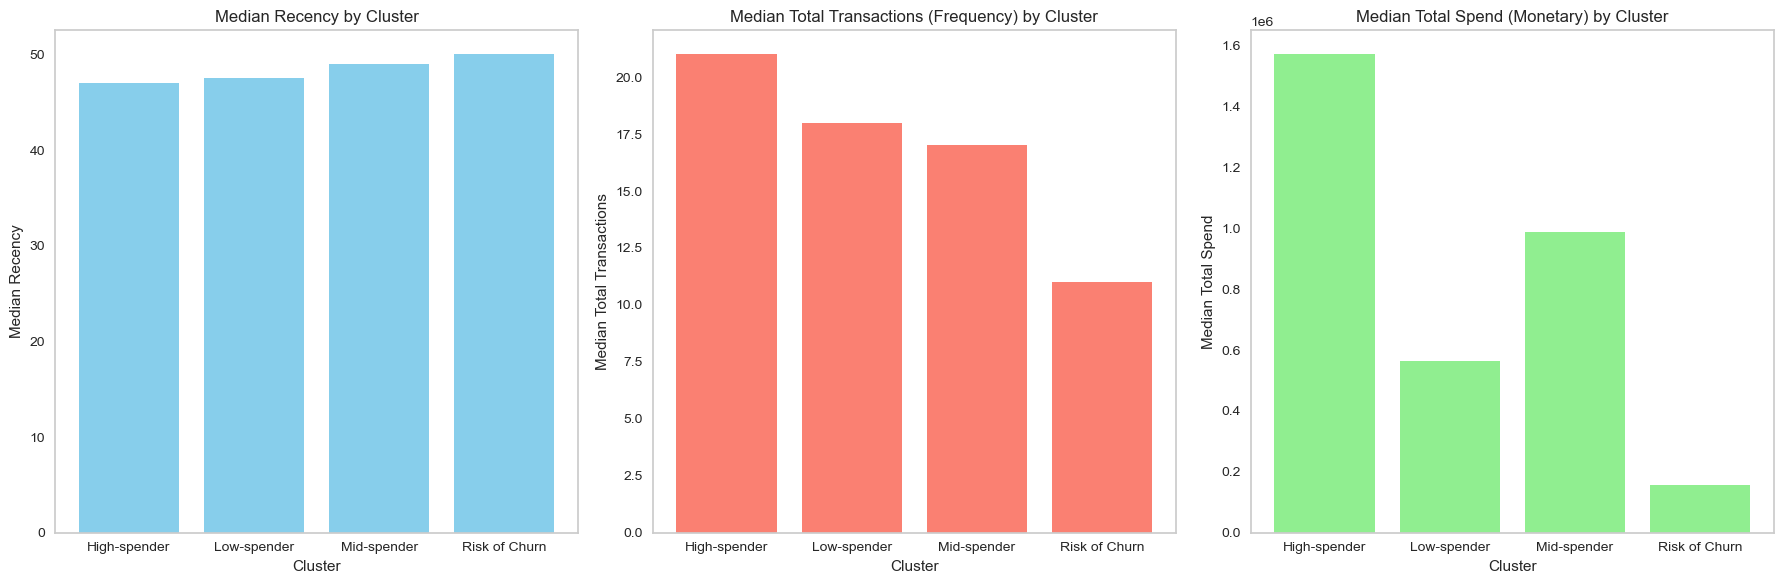

In [90]:
# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Recency Plot
axes[0].bar(rfm_median['cluster'], rfm_median['Recency'], color='skyblue')
axes[0].set_title('Median Recency by Cluster')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Median Recency')
axes[0].grid(False)

# Frequency Plot
axes[1].bar(rfm_median['cluster'], rfm_median['TotalTransactions'], color='salmon')
axes[1].set_title('Median Total Transactions (Frequency) by Cluster')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Median Total Transactions')
axes[1].grid(False)

# Monetary Plot
axes[2].bar(rfm_median['cluster'], rfm_median['TotalSpend'], color='lightgreen')
axes[2].set_title('Median Total Spend (Monetary) by Cluster')
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('Median Total Spend')
axes[2].grid(False)

plt.tight_layout()
plt.show()

## GMV

In [91]:
# Group by cluster and calculate the gmv
gmv = df.groupby('cluster')['TotalSpend'].sum().reset_index()

# Sort by cluster name for consistent plotting
gmv = gmv.sort_values('TotalSpend', ascending=False)

gmv

,cluster,TotalSpend
3,Risk of Churn,450057000
2,Mid-spender,327215000
0,High-spender,319460000
1,Low-spender,150487000


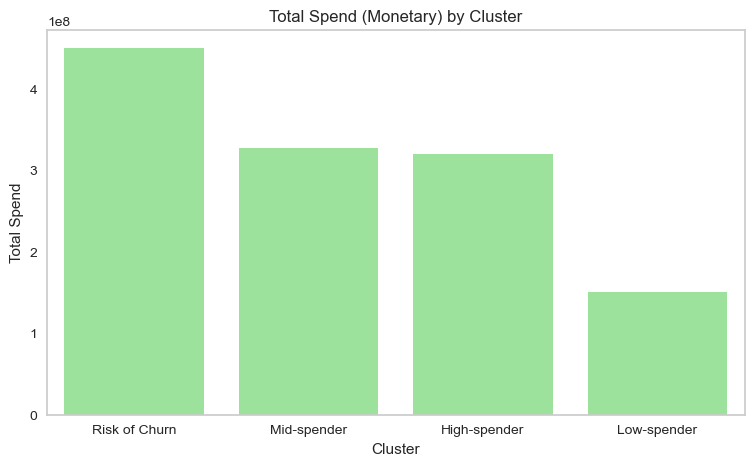

In [92]:
# GMV Plot
plt.figure(figsize=(9, 5))
sns.barplot(x='cluster', y='TotalSpend', data=gmv, color='lightgreen', errorbar=None, estimator='sum')
plt.title('Total Spend (Monetary) by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Spend')
plt.grid(False)

**Risk of Churn Generates the Highest GMV Despite Inactivity**

The *Risk of Churn* cluster generates the highest GMV (Rp 450 million), primarily due to its large number of customers.
Although customers in this cluster are currently inactive, they were major contributors to historical revenue.

**Insight**: The most valuable customers at present are actually at risk of churning. They are ideal targets for re-engagement campaigns, such as exclusive offers or personalized emails (“We miss you”), before they are lost for good.

If we continue to prioritize customers in this group and manage to prevent any of them from churning, we still have a potential GMV (Gross Merchandise Value) of **Rp 1.2 billion**, with the following breakdown:

* Risk of Churn: Rp 450,057,000
* Mid-spender: Rp 327,215,000
* High-spender: Rp 319,460,000
* Low-spender: Rp 150,487,000

# Recommendation

1. **Prioritize Re-engagement for the Risk of Churn Cluster**

   * This cluster contributes the highest GMV (**Rp 450 million**) due to its very large number of customers, even though they are currently inactive.
   * *Risk of Churn* customers mostly come from **low to medium income segments**, **have children**, and are **married**.

   **Recommendations:**

   * Launch *personalized re-engagement campaigns* such as “We miss you” emails, limited-time offers, or special loyalty points.
   * Focus on customers with **Very Low** transaction frequency, as they dominate this group and show a high risk of churn.
   * Use psychographic segmentation or behavior tracking to understand the reasons for inactivity.

2. **Retain and Upsell to Mid & High Spenders**

   * *Mid-Spender* and *High-Spender* segments generate a significant combined GMV (**Rp 647 million**).
   * Most of them come from **high-income groups**, **do not have children**, and have higher education levels (*Bachelor's and above*).

   **Recommendations:**

   * Offer *exclusive memberships*, *early access*, or *bundling promotions*.
   * Leverage education level and family status segmentation to create more relevant and aspirational content.
   * Implement *referral* or *reward strategies* to encourage loyalty and repeat purchases.

3. **Resegment Based on Potential Value, Not Just Current Activity**

   * Some high-value customers are classified under *Risk of Churn* simply due to decreased activity.

   **Recommendations:**

   * Add *lifetime value (LTV)* or *historical GMV* indicators into the segmentation model.
   * Create a “Dormant High Value” category as a top priority for reactivation efforts.


4. **Target Segments Based on Consistent Demographic Attributes**

   * *Married* status, higher education, and the *Middle Age* group (46–60) dominate nearly all clusters.

   **Recommendations:**

   * Use a *life-stage targeting* approach (e.g., specific campaigns for productive-age parents with relevant content).
   * Optimize copywriting and campaign visuals to reflect themes of family values, stability, and career aspirations.


5. **Build a Churn Prevention Strategy Based on Transaction Patterns**

   * Customers with transaction levels ranging from *Very Low* to *High* dominate the *Risk of Churn* cluster, not just the most passive ones.

   **Recommendations:**

   * Implement automatic notifications when a customer's transaction frequency drops significantly.
   * Develop an *early warning system* to detect active customers showing declining trends before they fully churn.